## Basic Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

## Данные

In [2]:
df = pd.read_csv('Исходные данные.csv', sep=';', decimal=',', index_col=0, parse_dates=['DT'])
df = df.set_index('nplv').sort_values('DT')
df.head()

DT  МАРКА ПРОФИЛЬ  t вып-обр  t обработка  \
nplv                                                                     
г6837?3<87? 2070-06-21 00:14:00  Э76ХФ     Р65       29.0    45.366667   
г683863<886 2070-06-21 01:07:00  Э76ХФ     Р65       26.0    44.066667   
г683863<887 2070-06-21 02:00:00  Э76ХФ     Р65       24.0    43.350000   
г683863<888 2070-06-21 02:58:00  Э76ХФ     Р65       17.0    46.183333   
г683863<889 2070-06-21 03:50:00  Э76ХФ     Р65       20.0    48.500000   

             t под током  t продувка  ПСН гр.  чист расход C  чист расход Cr  \
nplv                                                                           
г6837?3<87?    24.400000   41.033333      NaN       0.456460        0.059572   
г683863<886    13.866667   44.066667      NaN       0.359285        0.083738   
г683863<887    17.950000   43.350000      NaN       0.331665        0.081490   
г683863<888    19.816667   46.183333      NaN       0.377945        0.133194   
г683863<889    17.033333   48.500000      NaN       0.389875        0.105094   

             ...  химшлак первый MnO_1  химшлак первый R_1  \
nplv         ...                                             
г6837?3<87?  ...                  0.12                 2.6   
г683863<886  ...                  0.14                 2.2   
г683863<887  ...                  0.12                 2.6   
г683863<888  ...                  0.11                 2.4   
г683863<889  ...                  0.12                 2.4   

             химшлак первый SiO2_1  химшлак последний Al2O3  \
nplv                                                          
г6837?3<87?                    NaN                      NaN   
г683863<886                    NaN                      NaN   
г683863<887                    NaN                      NaN   
г683863<888                    NaN                      NaN   
г683863<889                    NaN                      NaN   

             химшлак последний CaO  химшлак последний FeO  \
nplv                                                        
г6837?3<87?                   53.4                    1.0   
г683863<886                   59.3                    0.6   
г683863<887                   57.2                    0.5   
г683863<888                   60.3                    0.5   
г683863<889                   60.3                    0.6   

             химшлак последний MgO  химшлак последний MnO  \
nplv                                                        
г6837?3<87?                    5.8                   0.15   
г683863<886                    4.1                   0.11   
г683863<887                    8.1                   0.13   
г683863<888                    6.3                   0.12   
г683863<889                    4.5                   0.09   

             химшлак последний R  химшлак последний SiO2  
nplv                                                      
г6837?3<87?                  2.6                     NaN  
г683863<886                  2.3                     NaN  
г683863<887                  2.3                     NaN  
г683863<888                  2.6                     NaN  
г683863<889                  2.5                     NaN  

[5 rows x 83 columns]

In [3]:
df.shape

(7041, 83)

In [4]:
# дубликатов нет
df.shape[0] == df.drop_duplicates().shape[0]

True

In [5]:
# уникальность индексов
len(df.index) == len(df.index.unique())

True

Одна запись соответствует одному производственному процессу, т.е. мы имеем дело не с временными рядами. В будущем колонка `DT` не пригодится.

Определим самую популярную марку стали, как просят в задании.

In [6]:
# самая популярная марка — Э76ХФ
df.groupby('МАРКА')[['произв  количество плавок', 'произв количество плавок (цел)']].agg(sum)

произв  количество плавок  произв количество плавок (цел)
МАРКА                                                            
09Г2С                         1.0                             1.0
900А                         52.0                            52.0
G2HH                         34.0                            34.0
R260                         33.0                            33.0
R350HT                       53.0                            53.0
НХ                            7.0                             7.0
С255                          1.0                             1.0
С345                          2.0                             2.0
С355                          1.0                             1.0
Ст3сп                         0.0                             0.0
Ш2.2                         44.0                            44.0
Ш2Л                          31.0                            31.0
Э73Ф                        223.0                           223.0
Э76                          49.0                            49.0
Э76Ф                         85.0                            85.0
Э76ХАФ                       50.0                            50.0
Э76ХФ                      4432.0                          4432.0
Э90ХАФ                     1346.0                          1346.0

In [7]:
df = df[df['МАРКА'] == 'Э76ХФ'] # оставляем самую популярную

In [8]:
df.drop(['МАРКА', 'DT'], axis=1, inplace=True) # уже не нужно

In [9]:
df.shape # осталось ~5К записей

(4953, 81)

In [10]:
# cмотрим на пропуски по столбцам
nuls = df.isnull().mean().to_frame().sort_values(by=0, ascending = False)
nuls.columns = ['%_nuls']
nuls.head(20)

%_nuls
ферспл  ферванит            1.000000
ферспл  Ni H1 пласт.        1.000000
ферспл FeV азот.            1.000000
ферспл FeSi-75              1.000000
ферспл FeMo                 1.000000
расход газ  N2              1.000000
N2 (интенс.)                1.000000
сыпуч кварцит               0.998991
сыпуч  кокс. мелочь (сух.)  0.998587
расход C пров.              0.896426
химшлак последний SiO2      0.341005
химшлак последний Al2O3     0.341005
химшлак первый Al2O3_1      0.341005
химшлак первый SiO2_1       0.341005
сыпуч известь РП            0.336967
ПСН гр.                     0.275187
сыпуч  шпат плав.           0.168988
химсталь последний Ca       0.130830
ферспл CaC2                 0.130628
сыпуч  кокс. мелочь КМ1     0.122754

Видим из предыдущего, что есть столбцы, где > 80% данных отсутствует. Их не имеет смысла использовать дальше в прогнозе.

In [11]:
cols2drop = nuls.loc[nuls['%_nuls']>0.5].index
cols2drop

Index(['ферспл  ферванит', 'ферспл  Ni H1 пласт.', 'ферспл FeV азот.',
       'ферспл FeSi-75', 'ферспл FeMo', 'расход газ  N2', 'N2 (интенс.)',
       'сыпуч кварцит', 'сыпуч  кокс. мелочь (сух.)', 'расход C пров.'],
      dtype='object')

In [12]:
df.drop(cols2drop, axis=1, inplace=True)

В задании просят заменить пропуски химанализа на 0, где треть выборки отсутсвует. Выделим эти колонки, но сейчас заменять не будем, так как это может сильно сказаться на результатах EDA.

In [13]:
cols_to_null = ['химшлак первый Al2O3_1', 'химшлак первый SiO2_1']

Уберем строки с большим числом Nan из датасета. *Наблюдение*: если данных нет, их нет во всех столбцах, начиная с `t под током`.

In [14]:
# Проверка наблюдения по nan в строках
tmp = df.loc[df['t под током'].isnull(), 't вып-обр':]
res = tmp.count() / tmp.shape[0]
res

t вып-обр                 0.005725
t обработка               0.005725
t под током               0.000000
t продувка                0.005725
ПСН гр.                   0.000000
                            ...   
химшлак последний FeO     0.005725
химшлак последний MgO     0.005725
химшлак последний MnO     0.005725
химшлак последний R       0.005725
химшлак последний SiO2    0.001908
Length: 70, dtype: float64

In [15]:
res[res > 0.01] # действительно практически пустые строки

Series([], dtype: float64)

In [16]:
df = df.loc[~df['t под током'].isnull()]

In [17]:
df.shape # итого около 4,5К записей

(4429, 71)

In [18]:
df[(df==0).any(1)] # одно нулевое значение (без замены Nan на 0)

ПРОФИЛЬ  t вып-обр  t обработка  t под током  t продувка  ПСН гр.  \
nplv                                                                            
г683863=?;:     Р65        0.0    69.716667        20.85   69.716667      NaN   

             чист расход C  чист расход Cr  чист расход Mn  чист расход Si  \
nplv                                                                         
г683863=?;:        0.36646        0.061256        0.113854         0.07798   

             ...  химшлак первый MnO_1  химшлак первый R_1  \
nplv         ...                                             
г683863=?;:  ...                  0.12                 3.1   

             химшлак первый SiO2_1  химшлак последний Al2O3  \
nplv                                                          
г683863=?;:                    NaN                      NaN   

             химшлак последний CaO  химшлак последний FeO  \
nplv                                                        
г683863=?;:                   62.5                    0.3   

             химшлак последний MgO  химшлак последний MnO  \
nplv                                                        
г683863=?;:                    9.3                   0.06   

             химшлак последний R  химшлак последний SiO2  
nplv                                                      
г683863=?;:                  2.8                     NaN  

[1 rows x 71 columns]

# EDA

In [19]:
TARGETS = ['химшлак последний Al2O3', 'химшлак последний CaO',
           'химшлак последний R', 'химшлак последний SiO2']

In [20]:
# определяем порядковые фичи
for col in df.columns:
    if (df[col].nunique() <= 50) & (df[col].dtype != object) & (col not in TARGETS):
        df[col] = df[col].astype('category')

In [21]:
NUMERICAL = df.select_dtypes(exclude=['category', 'object', 'datetime64']).columns.tolist()
CATEGORICAL = df.select_dtypes(include=['object']).columns.tolist()
ORDINAL = df.select_dtypes(include=['category']).columns.tolist()
for tar in TARGETS:
    if tar in NUMERICAL:
        NUMERICAL.remove(tar)

### Categorical features

In [22]:
CATEGORICAL

['ПРОФИЛЬ']

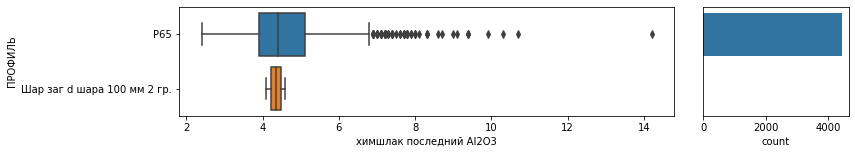

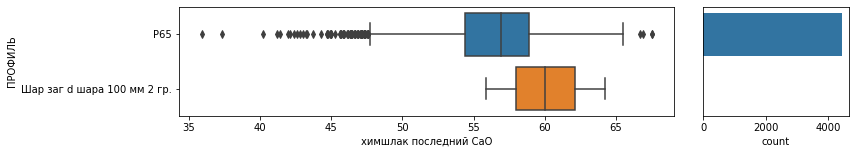

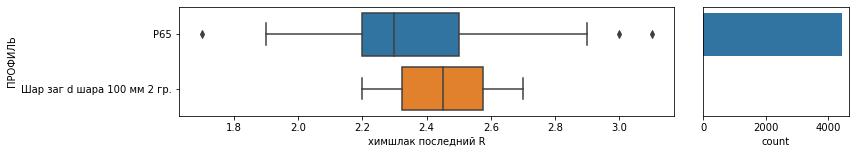

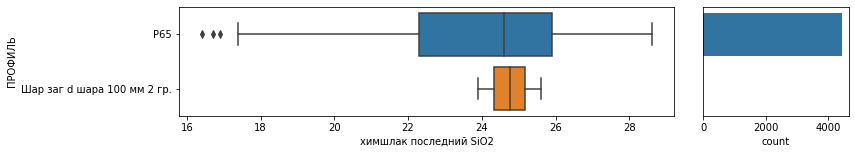

In [23]:
for i in range(len(TARGETS)):
    fig = plt.figure(figsize=(12, 2))
    grid = plt.GridSpec(1, 4, wspace=0.2, hspace=0.1)
    box_ax = fig.add_subplot(grid[0, :3])
    cnt_ax = fig.add_subplot(grid[0, -1])

    sns.boxplot(y='ПРОФИЛЬ', x=TARGETS[i], data=df[['ПРОФИЛЬ', TARGETS[i]]], ax=box_ax)
    sns.countplot(y='ПРОФИЛЬ', data=df[['ПРОФИЛЬ', TARGETS[i]]])
    cnt_ax.set_ylabel('')
    cnt_ax.set_yticks([]);

In [24]:
from collections import Counter
Counter(df['ПРОФИЛЬ'])

Counter({'Р65': 4427, 'Шар заг d шара 100 мм 2 гр.': 2})

Доминирует одна категория, так что можно выбросить столбец и соответствующие строки.

In [25]:
df.drop(df[df['ПРОФИЛЬ']=='Шар заг d шара 100 мм 2 гр.'].index, axis=0, inplace=True)
df.drop('ПРОФИЛЬ', axis=1, inplace=True)

### Ordinal features

Так же определим порядковые фичи с доминантым значением. Их можно удалить, так как они не вносят вклад в модель.

In [26]:
def find_ordinal_with_dominant(df, size=50, with_dominant_value=False, max_percent=0.9):
    # if a number of unique varibles is less than or equal to n, this variable is considered as categorial
    names = df.columns
    ordinal_vars = []
    for n in names:
        if df[n].nunique() <= size:
            if with_dominant_value:
                nums = df[n].value_counts().values
                if (len(nums) > 0) and (nums[0] / np.sum(nums) > max_percent ):
                    ordinal_vars.append(n) 
            else:
                ordinal_vars.append(n)
                
    return ordinal_vars

In [27]:
dominant_ords = find_ordinal_with_dominant(df, with_dominant_value=True, max_percent=0.9)
dominant_ords

['произв количество обработок',
 'произв  количество плавок',
 'произв количество плавок (цел)',
 'ферспл CaC2']

<Figure size 432x288 with 0 Axes>

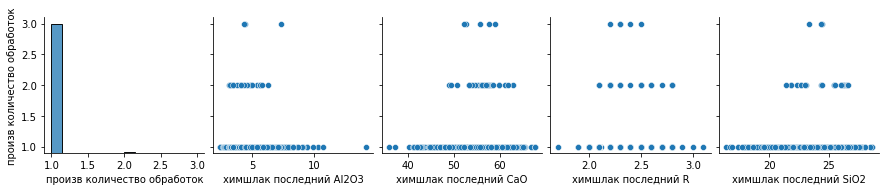

<Figure size 432x288 with 0 Axes>

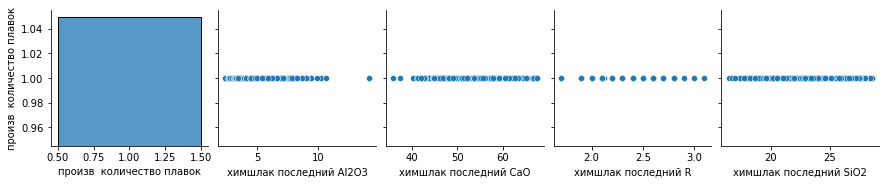

<Figure size 432x288 with 0 Axes>

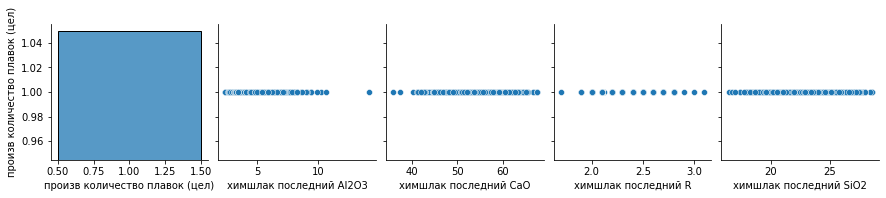

<Figure size 432x288 with 0 Axes>

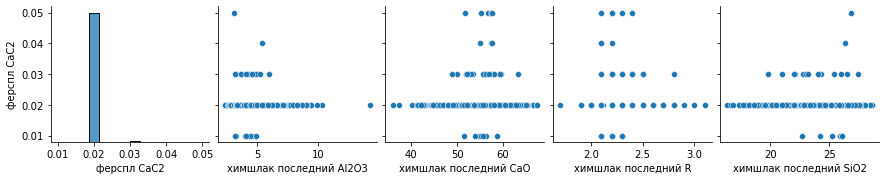

In [28]:
for i in range(len(dominant_ords)):
    plt.figure()
    sns.pairplot(df[[dominant_ords[i]]+TARGETS].astype(float), y_vars=dominant_ords[i])
    plt.show();

In [29]:
# оставим 'произв количество обработок' и 'ферспл CaC2', потому что с ними ещё не всё понятно
df.drop(dominant_ords[1:-1], axis=1, inplace=True)

### Numerical features

In [30]:
len(NUMERICAL)

42

In [31]:
pd.set_option('display.max_columns', None)
df[NUMERICAL].describe()

t вып-обр  t обработка  t под током   t продувка      ПСН гр.  \
count  4427.000000  4424.000000  4427.000000  4427.000000  3588.000000   
mean     25.797154    45.763336    20.742640    45.683469     2.979921   
std      14.458628     9.990740     4.583536     9.679471     0.731930   
min       0.000000     4.683333     2.816667     4.683333     1.000000   
25%      13.000000    42.033333    17.750000    42.008333     2.520466   
50%      25.000000    44.183333    20.216667    44.066667     3.000000   
75%      36.000000    47.033333    23.016667    47.016667     3.479431   
max      91.000000   294.083333    67.583333   251.000000     6.702208   

       чист расход C  чист расход Cr  чист расход Mn  чист расход Si  \
count    4422.000000     4415.000000     4421.000000     4421.000000   
mean        0.376256        0.125208        0.133968        0.137117   
std         0.076072        0.027275        0.048963        0.038940   
min         0.007000        0.005630        0.000356        0.014973   
25%         0.329163        0.108297        0.100727        0.111405   
50%         0.377573        0.125840        0.133446        0.134319   
75%         0.428183        0.143510        0.167049        0.158528   
max         0.728360        0.291657        0.360708        0.478882   

       чист расход V  температура первая  температура последняя  Ar (интенс.)  \
count    4411.000000         4425.000000            4425.000000   4427.000000   
mean        0.039701         1567.722034            1587.561582     11.342613   
std         0.001596           22.180992              13.822102      3.440088   
min         0.002965         1493.000000            1521.000000      2.456416   
25%         0.038892         1553.000000            1579.000000      8.996150   
50%         0.039631         1568.000000            1585.000000     10.777695   
75%         0.040402         1583.000000            1593.000000     13.076385   
max         0.076948         1653.000000            1647.000000     27.844325   

       эл. энергия (интенс.)  произв жидкая сталь  расход газ Ar  \
count            4427.000000          4427.000000    4427.000000   
mean            12980.785450           114.479173      16.999671   
std               899.340316             2.399235       5.622810   
min              6105.482555           101.200000       0.284000   
25%             12506.683047           113.000000      13.258000   
50%             13031.123139           114.600000      16.105000   
75%             13479.803980           116.000000      19.481000   
max             38216.817594           171.400000      69.001000   

       сыпуч известь РП  сыпуч кокс пыль УСТК  сыпуч  кокс. мелочь КМ1  \
count       3281.000000           4415.000000              4342.000000   
mean           0.130250              0.063300                 0.385319   
std            0.076075              0.069702                 0.093364   
min            0.003000              0.010000                 0.012000   
25%            0.076000              0.050000                 0.327000   
50%            0.116000              0.050000                 0.387000   
75%            0.161000              0.050000                 0.451000   
max            0.690000              0.703000                 0.834000   

       сыпуч  шпат плав.  ферспл  FeV-80  ферспл  Mn5Si65Al0.5  ферспл SiMn18  \
count        4113.000000     4412.000000           4415.000000    4400.000000   
mean            0.054199        0.049993              0.155169       0.207319   
std             0.023245        0.002028              0.050666       0.075464   
min             0.014000        0.003725              0.015000       0.013000   
25%             0.038000        0.049009              0.122500       0.154000   
50%             0.048000        0.049949              0.152000       0.206000   
75%             0.069000        0.050890              0.183000       0.258000   
max             0.224000        0.0

По `max` и `min` видно, что во многих колонках присутсвуют выбросы.

In [32]:
pd.reset_option('max_columns')

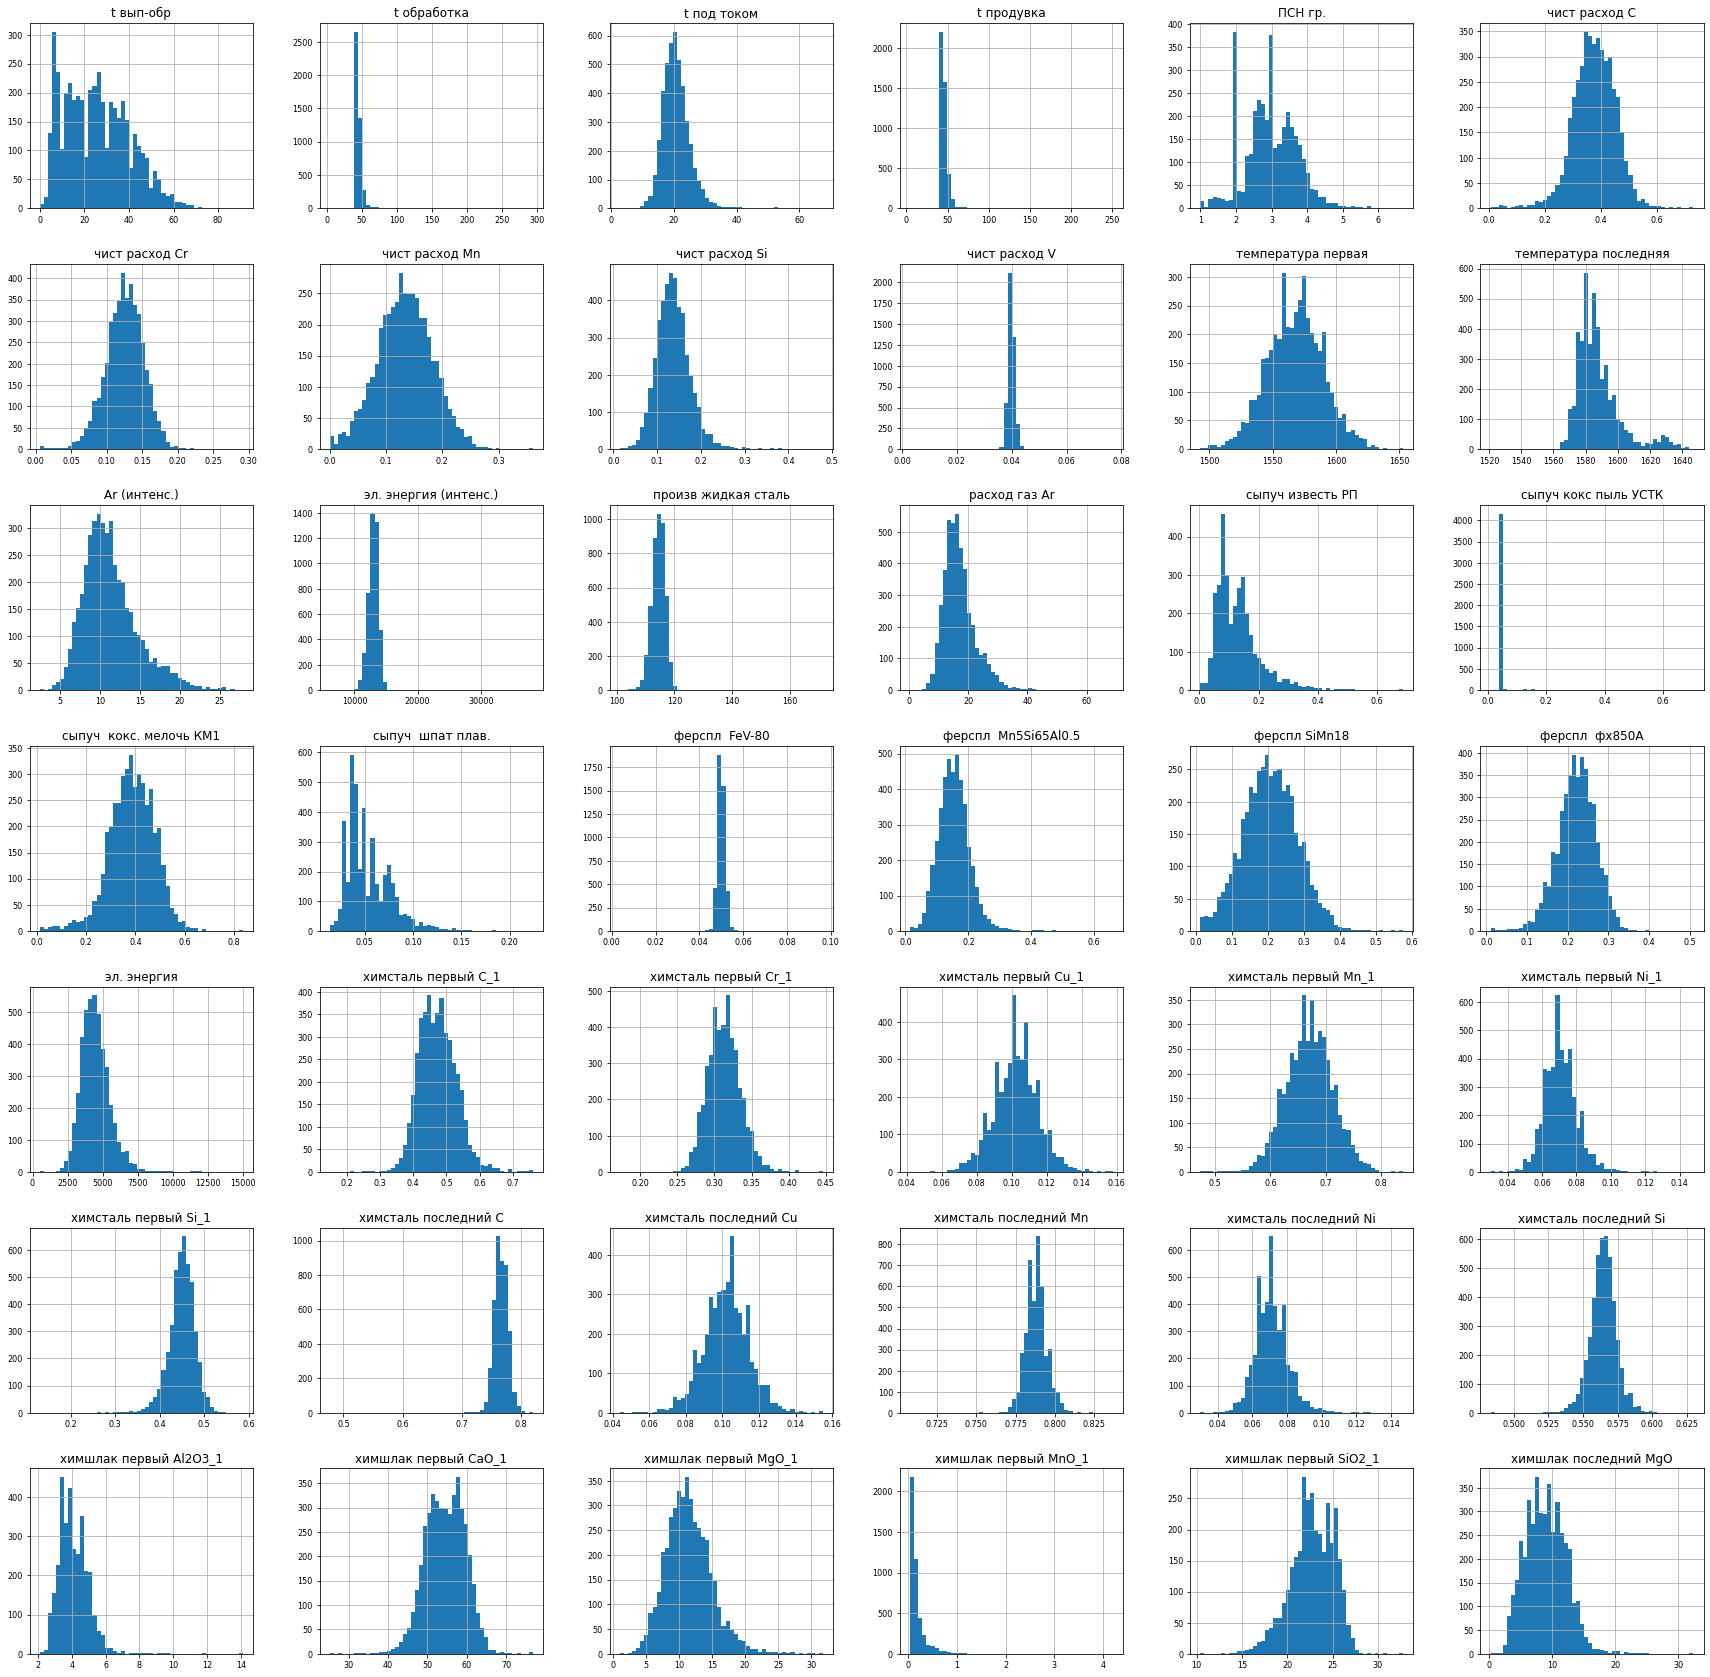

In [33]:
import warnings
warnings.filterwarnings('ignore')

df[NUMERICAL].hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

Интересно выглядят распределения `ПСН гр.` (можно сказать, что бимодальное) и `сыпуч кокс пыль УСТК` (тоже есть доминирующее значение). Остальные распределения похожи на нормальные либо с перекосом влево.

In [34]:
def std_boxplot(dataframe, features=[], *args, **kwargs):
    x = dataframe[features].copy()
    # standardize features
    for col in x.columns:
        x[col] = (x[col] - x[col].mean()) / x[col].std()
    # draw boxplot
    fig,ax=plt.subplots(*args, **kwargs)
    sns.boxplot(data=x, ax=ax, orient='h')
    ax.set_xticks(np.arange(0,int(max(x.max(axis=1,skipna=True))),5))
    plt.xticks(fontsize='8')
    plt.grid()
    plt.show();
    return x

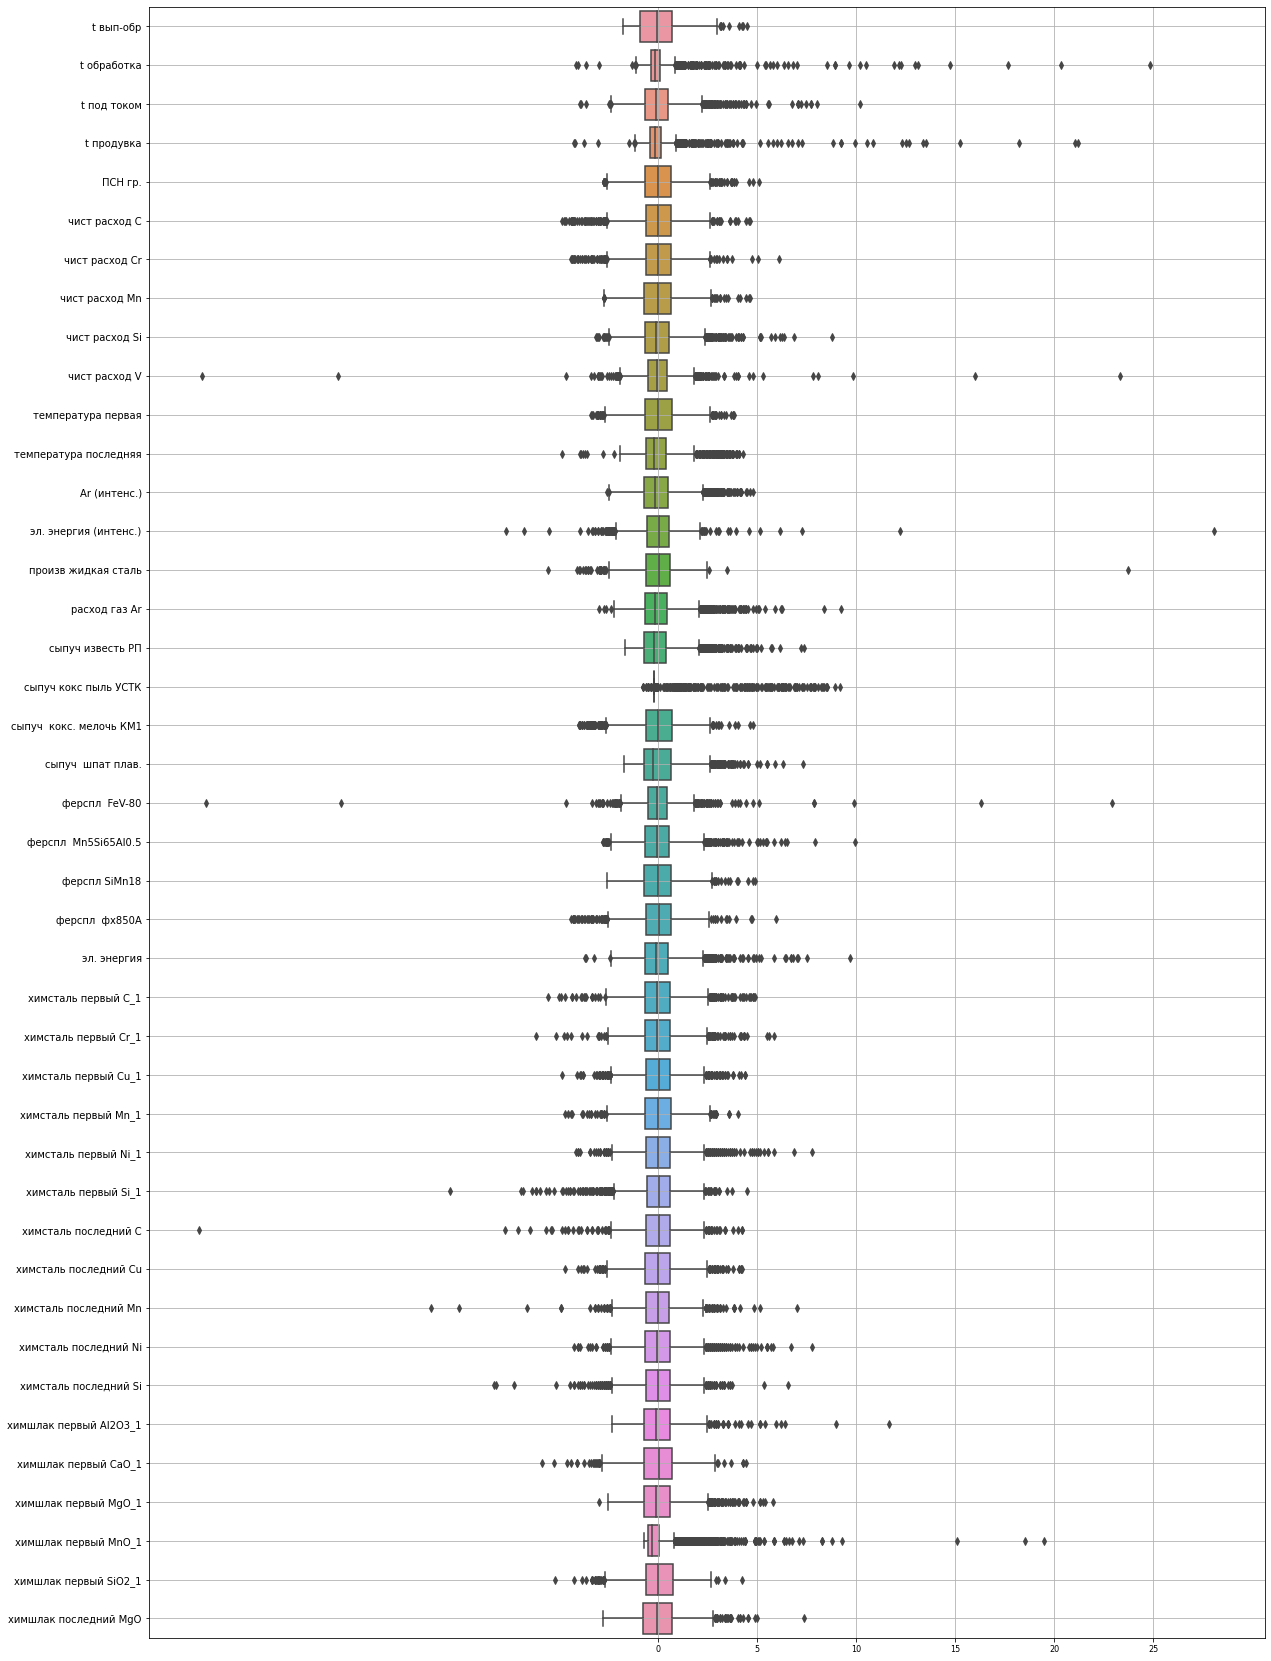

In [35]:
plot = std_boxplot(df, NUMERICAL, figsize=(20,30))

In [36]:
# уберём выбросы по квантилям
def remove_outliers(df, features=[], left_q=.05, right_q=.95):
    outliers_ids = []
    for f in features:
        x = df[f].dropna()
        x = (x - x.mean()) / x.std()
        outliers_ids += list(x[~x.between(x.quantile(left_q), x.quantile(right_q))].index)
    return list(set(outliers_ids))

In [37]:
outliers_ids = remove_outliers(df, NUMERICAL, .001, 0.999) # сильно жёстко не зачищаем, так как данных и так мало
print('Найдено выбросов: {}'.format(len(outliers_ids)))

Найдено выбросов: 226


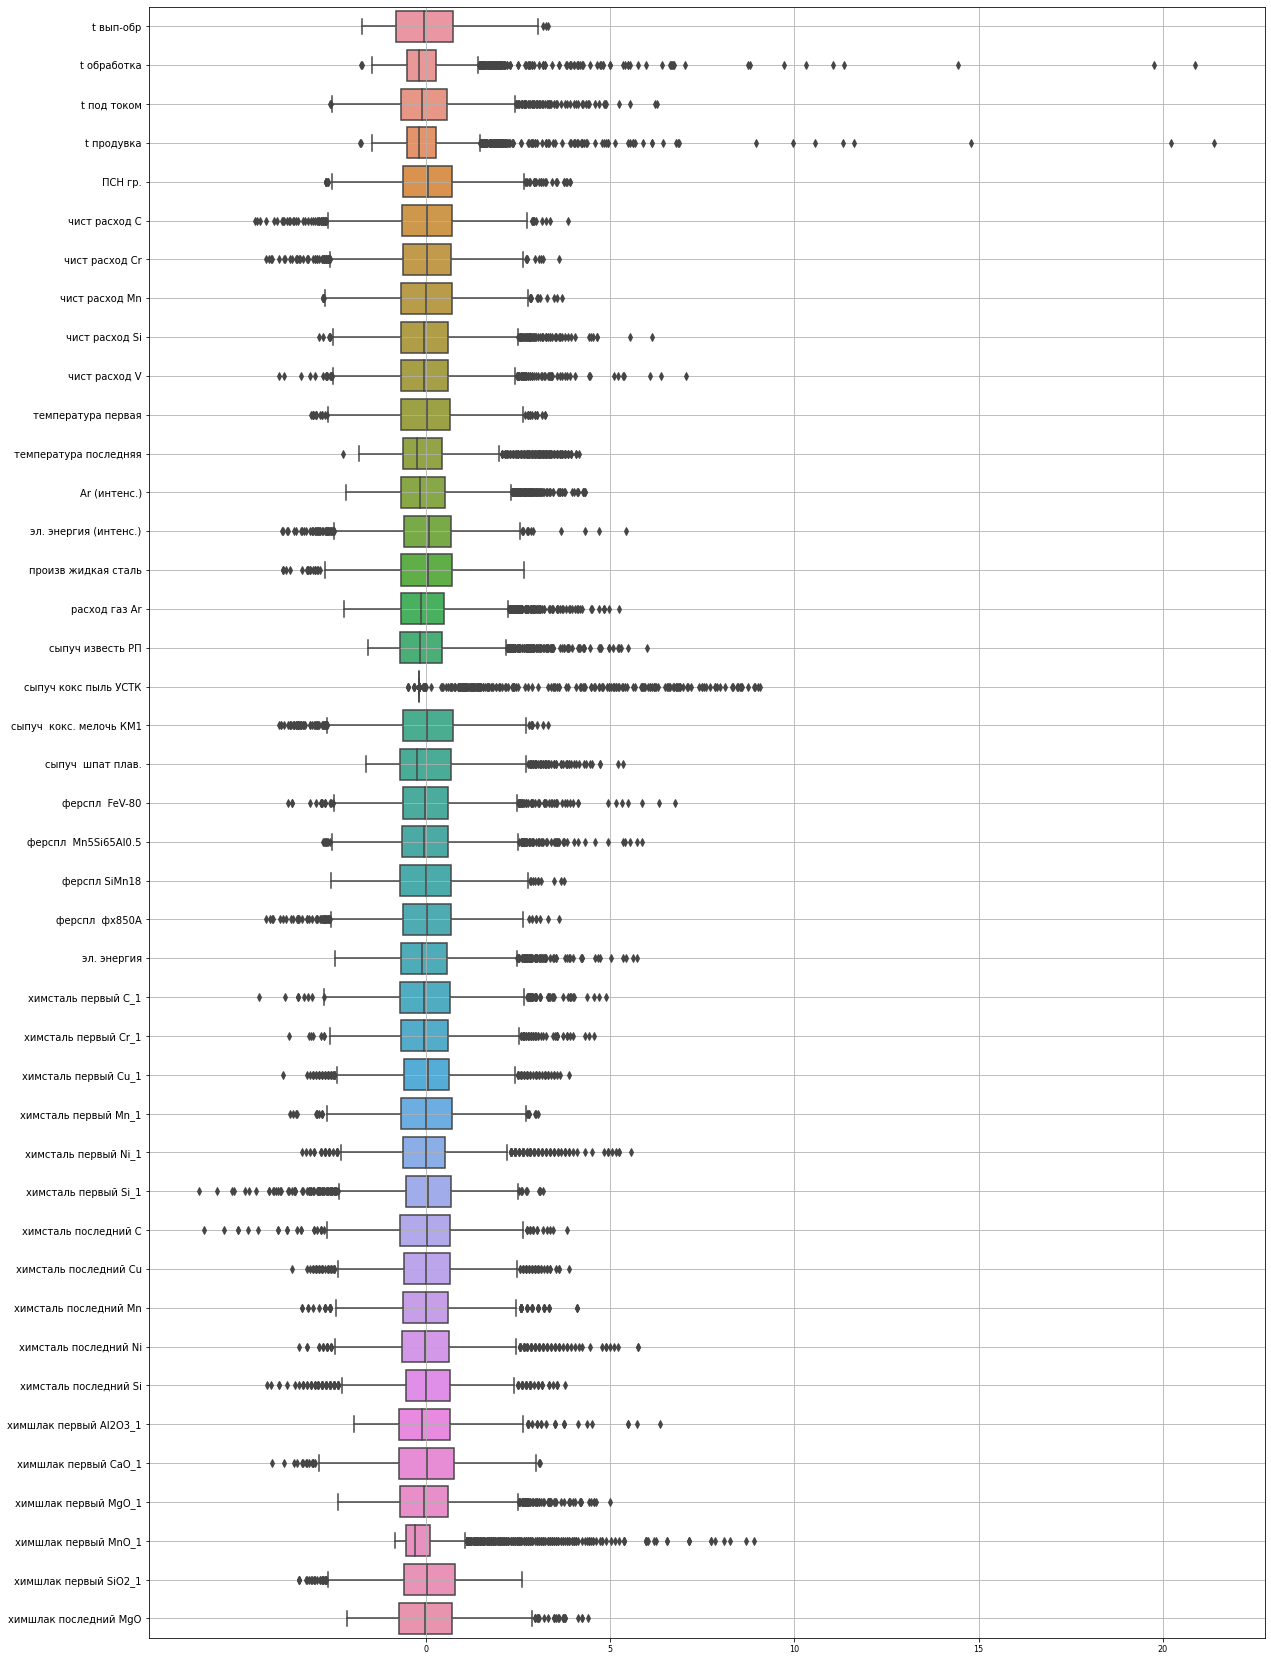

In [38]:
plot = std_boxplot(df.loc[~df.index.isin(outliers_ids)], NUMERICAL, figsize=(20,30))

In [39]:
# ещё осталось несколько значительных выбросов, так что удалим вручную
extra_outliers = []
extra_outliers += plot[(plot >= 5).any(1)].index.tolist()
len(extra_outliers)

149

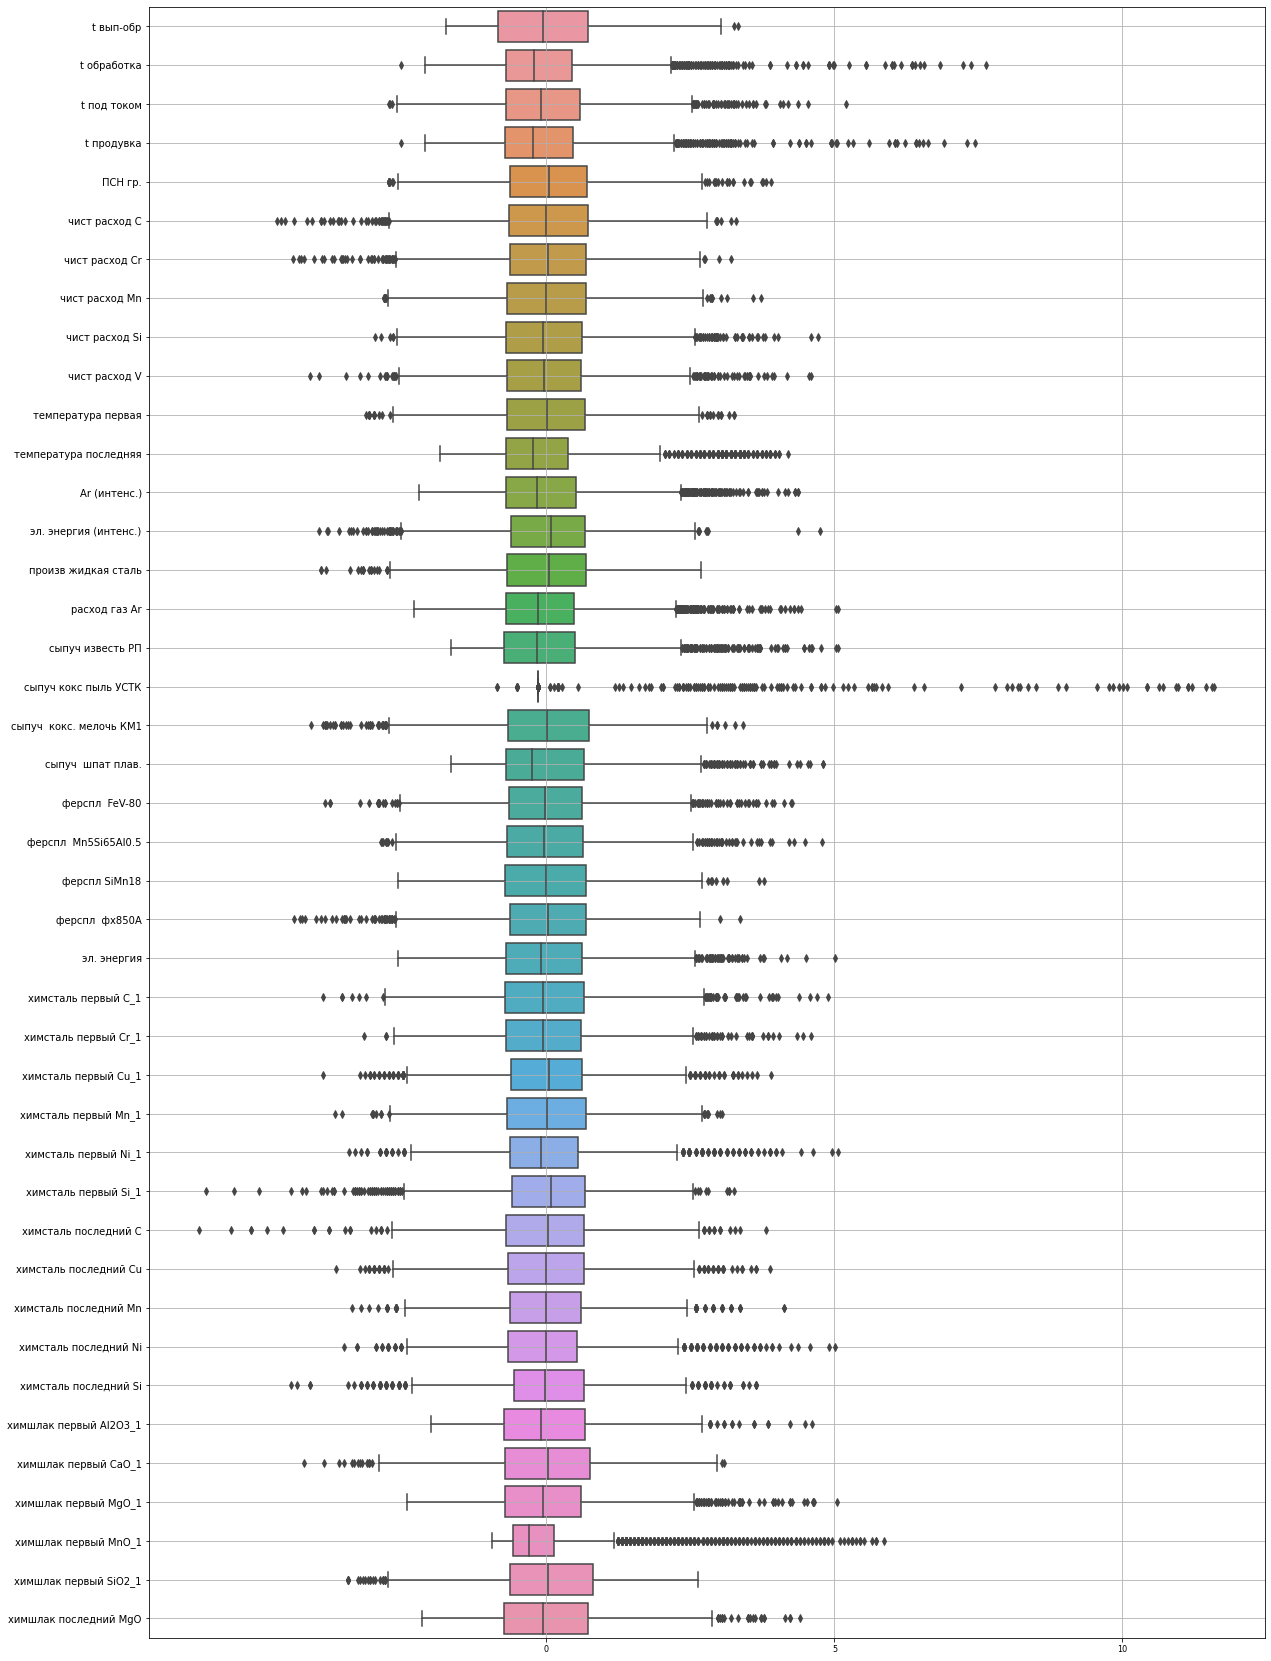

In [40]:
_ = std_boxplot(df.loc[~df.index.isin(outliers_ids+extra_outliers)], NUMERICAL, figsize=(20,30))

In [41]:
# % выбросов
len(set(outliers_ids+extra_outliers)) / df.shape[0]

0.084707476846623

In [42]:
df.drop(set(outliers_ids+extra_outliers), axis=0, inplace=True)

Посмотрим пэирплоты на наличие явных закономерностей независимых переменных с зависимыми.

<Figure size 432x288 with 0 Axes>

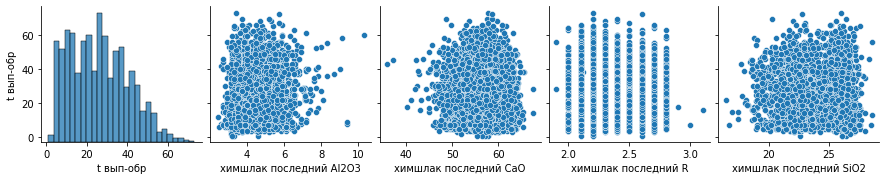

<Figure size 432x288 with 0 Axes>

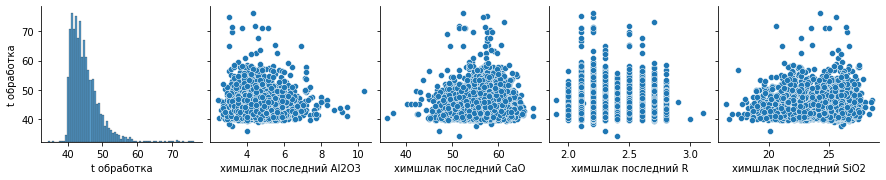

<Figure size 432x288 with 0 Axes>

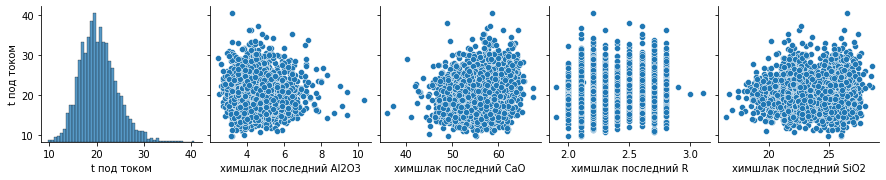

<Figure size 432x288 with 0 Axes>

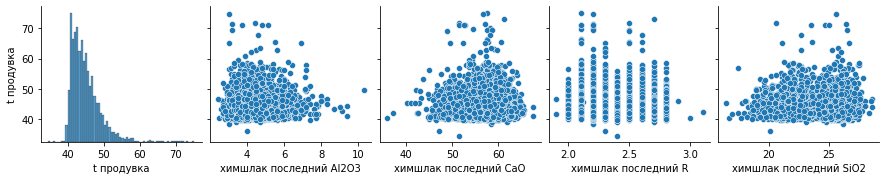

<Figure size 432x288 with 0 Axes>

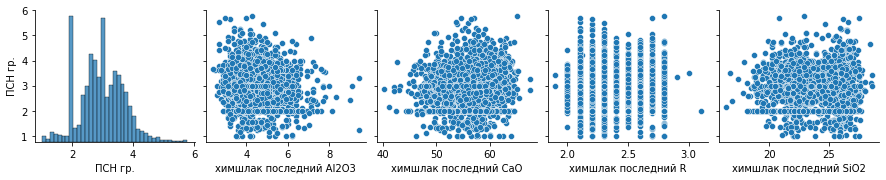

<Figure size 432x288 with 0 Axes>

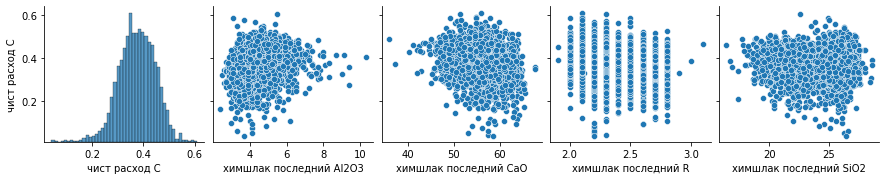

<Figure size 432x288 with 0 Axes>

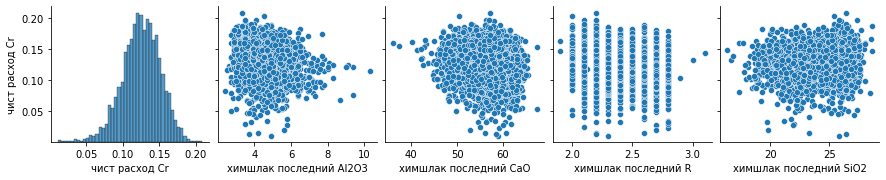

<Figure size 432x288 with 0 Axes>

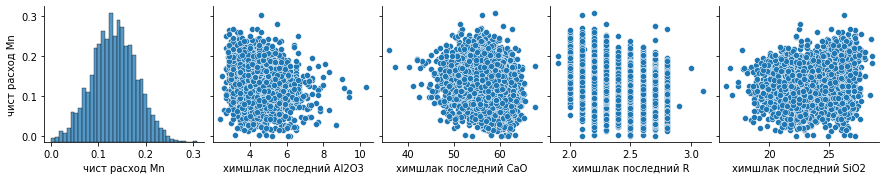

<Figure size 432x288 with 0 Axes>

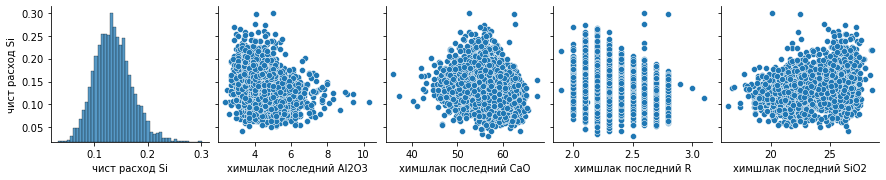

<Figure size 432x288 with 0 Axes>

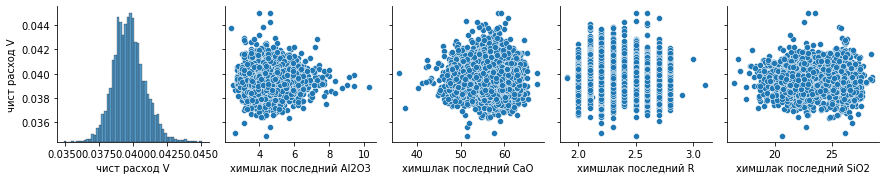

<Figure size 432x288 with 0 Axes>

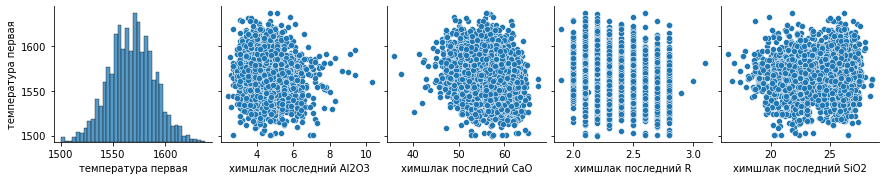

<Figure size 432x288 with 0 Axes>

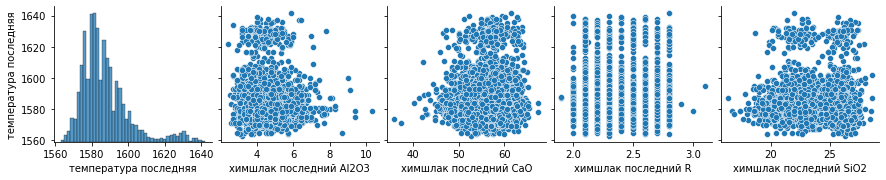

<Figure size 432x288 with 0 Axes>

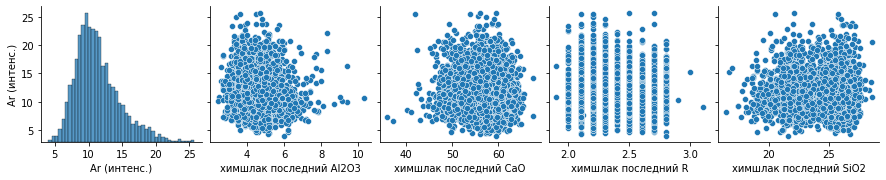

<Figure size 432x288 with 0 Axes>

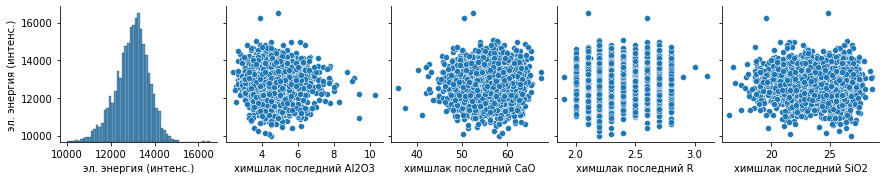

<Figure size 432x288 with 0 Axes>

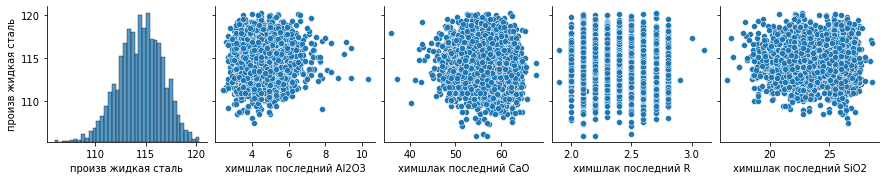

<Figure size 432x288 with 0 Axes>

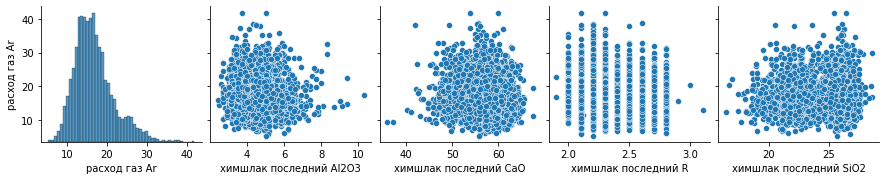

<Figure size 432x288 with 0 Axes>

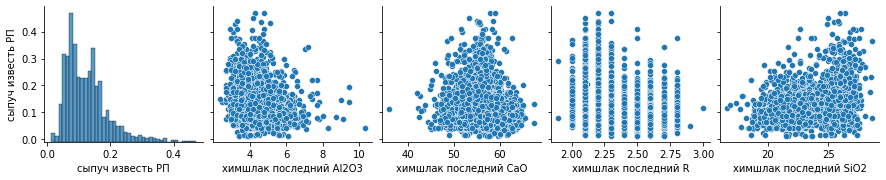

<Figure size 432x288 with 0 Axes>

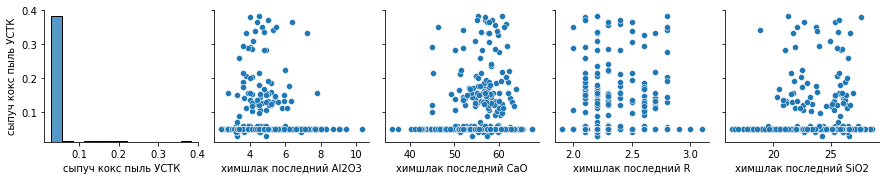

<Figure size 432x288 with 0 Axes>

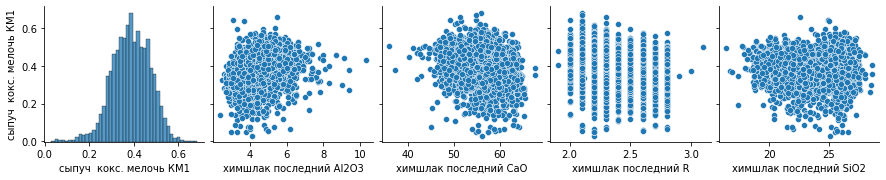

<Figure size 432x288 with 0 Axes>

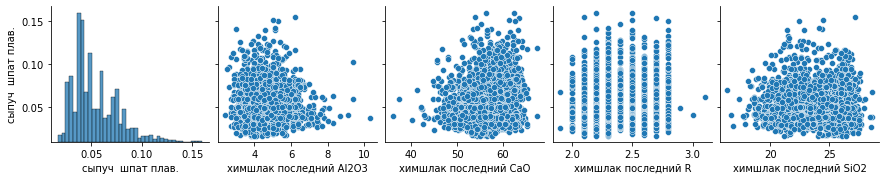

<Figure size 432x288 with 0 Axes>

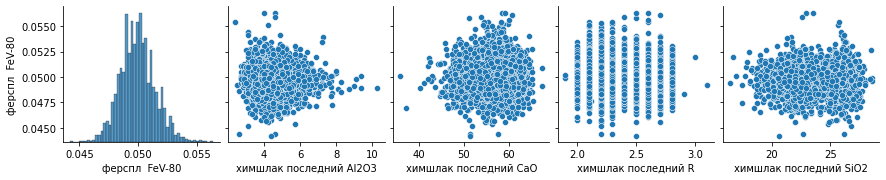

<Figure size 432x288 with 0 Axes>

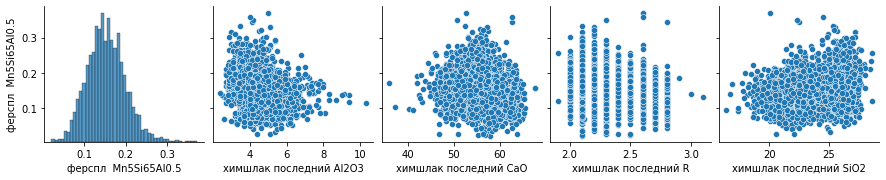

<Figure size 432x288 with 0 Axes>

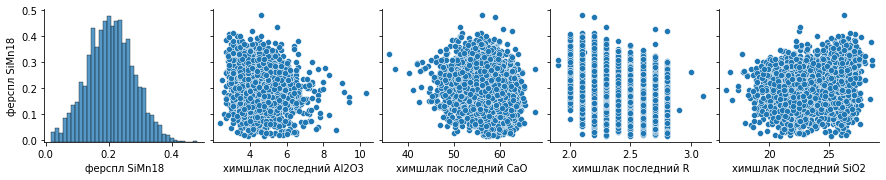

<Figure size 432x288 with 0 Axes>

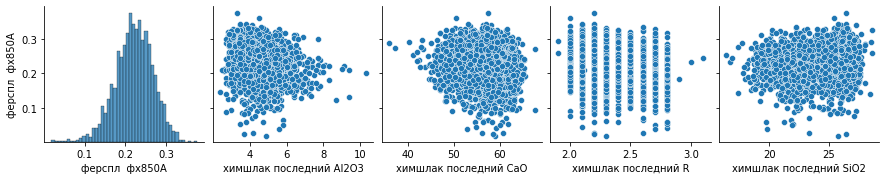

<Figure size 432x288 with 0 Axes>

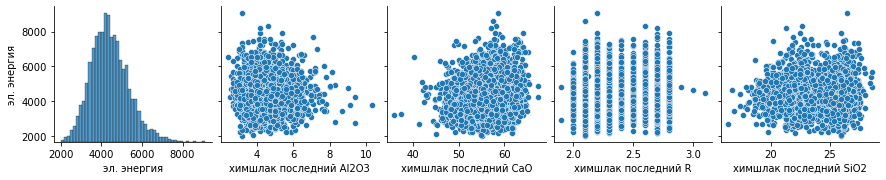

<Figure size 432x288 with 0 Axes>

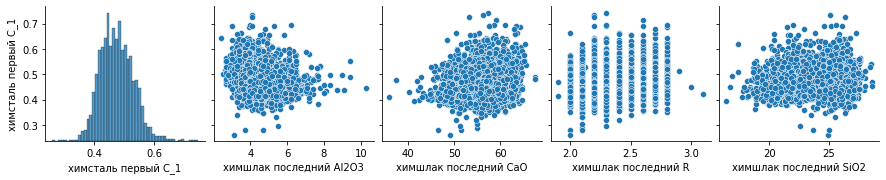

<Figure size 432x288 with 0 Axes>

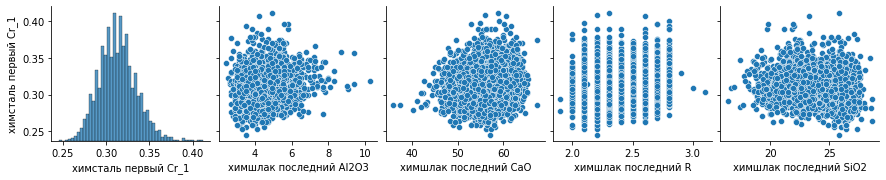

<Figure size 432x288 with 0 Axes>

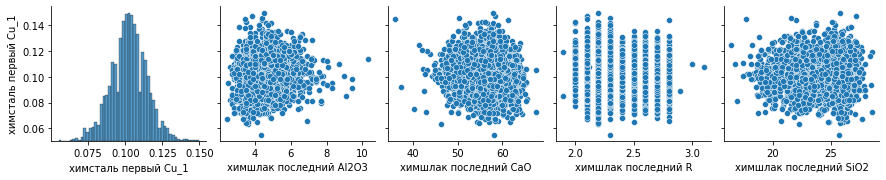

<Figure size 432x288 with 0 Axes>

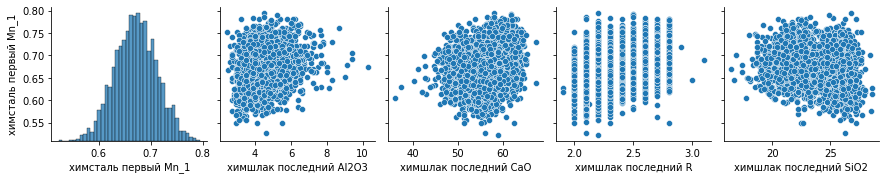

<Figure size 432x288 with 0 Axes>

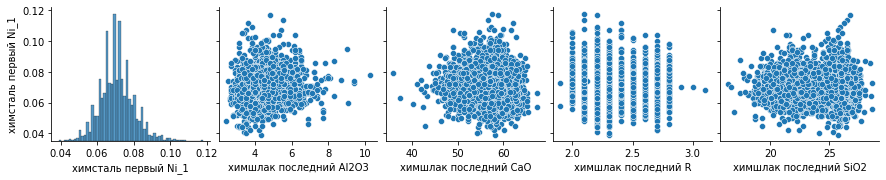

<Figure size 432x288 with 0 Axes>

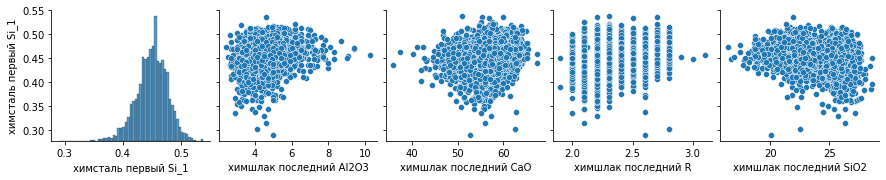

<Figure size 432x288 with 0 Axes>

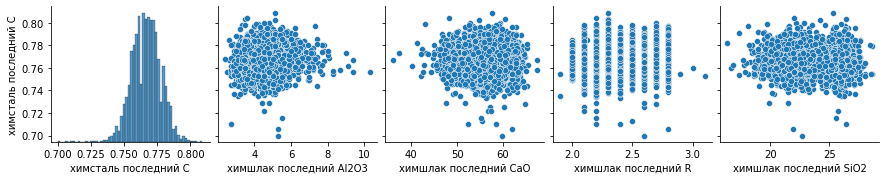

<Figure size 432x288 with 0 Axes>

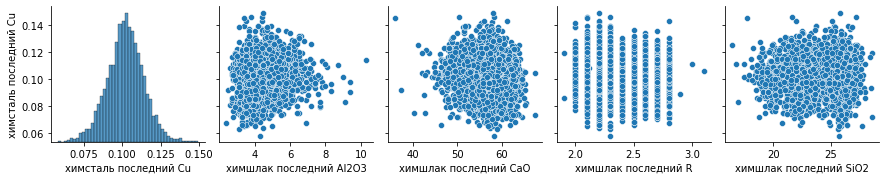

<Figure size 432x288 with 0 Axes>

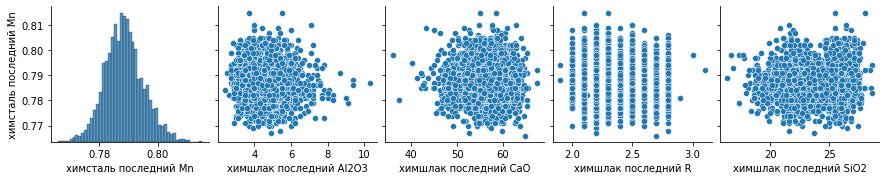

<Figure size 432x288 with 0 Axes>

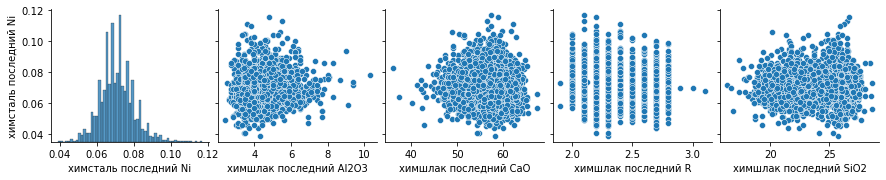

<Figure size 432x288 with 0 Axes>

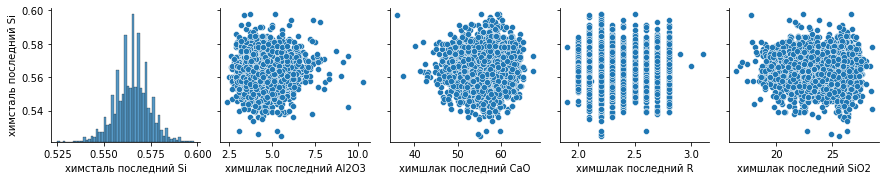

<Figure size 432x288 with 0 Axes>

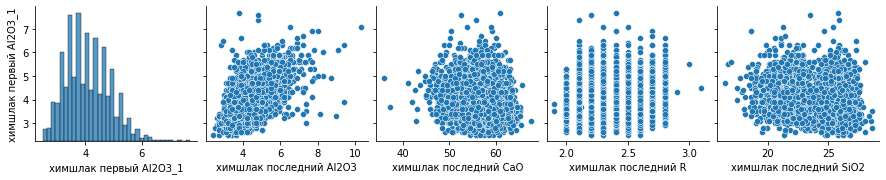

<Figure size 432x288 with 0 Axes>

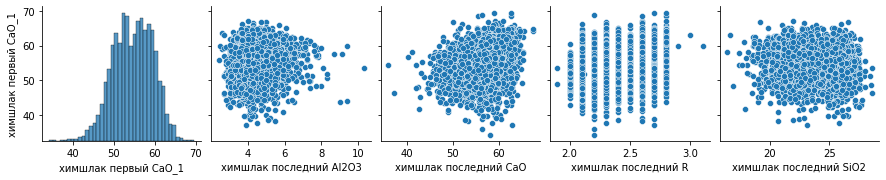

<Figure size 432x288 with 0 Axes>

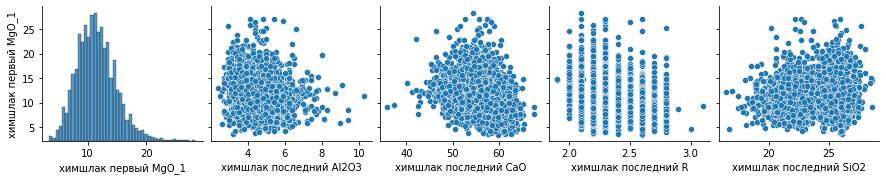

<Figure size 432x288 with 0 Axes>

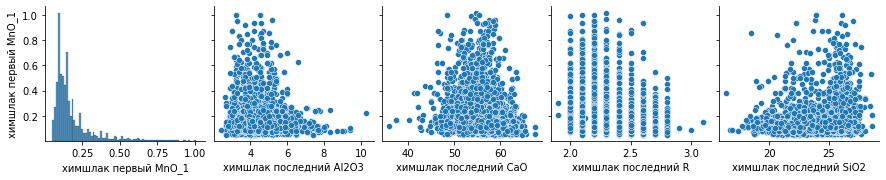

<Figure size 432x288 with 0 Axes>

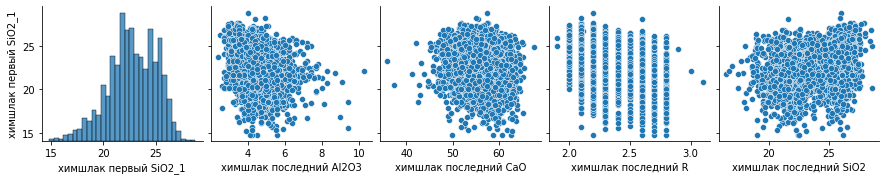

<Figure size 432x288 with 0 Axes>

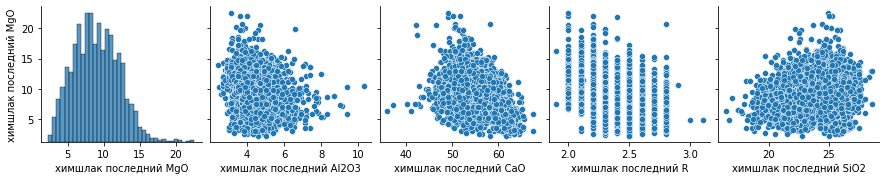

In [43]:
for i in range(len(NUMERICAL)):
    plt.figure()
    sns.pairplot(df[[NUMERICAL[i]]+TARGETS], y_vars=NUMERICAL[i])
    plt.show();

Явных закономерностей нет. Однако `химшлак последний R` имеет только определённые значения.

In [44]:
# df.to_csv('Очищенные данные.csv')

### Correlation

На значение корреляции сильно влияют выбросы, поэтому мы их удалили перед этим этапом.

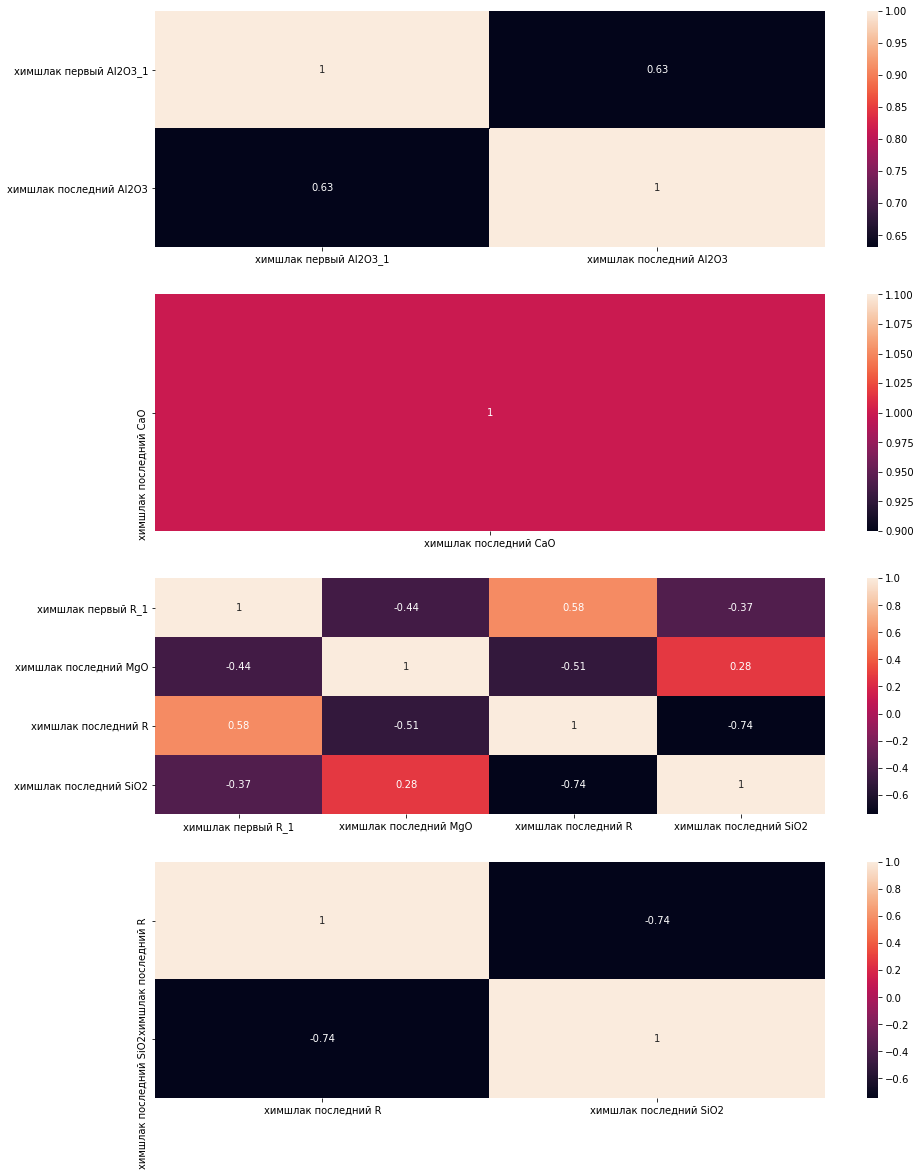

In [45]:
fig,ax = plt.subplots(4, figsize=(15,20))
for i,tar in enumerate(TARGETS):
    corr = df.astype(float).corr()
    condition = (corr[tar] > 0.5) | (corr[tar] < -0.5)
    top_corr = corr.loc[condition, condition]
    sns.heatmap(top_corr, ax=ax[i], annot=True)

**Химшлак последний R** отрицательно коррелирует с **Химшлак последний SiO2**!

# Modelling

In [46]:
df = pd.read_csv('Очищенные данные.csv', sep=',', index_col=0)
df.head()

t вып-обр  t обработка  t под током  t продувка   ПСН гр.  \
nplv                                                                     
г6837?3<87?       29.0    45.366667    24.400000   41.033333       NaN   
г683863<887       24.0    43.350000    17.950000   43.350000       NaN   
г683863<888       17.0    46.183333    19.816667   46.183333       NaN   
г683863<889       20.0    48.500000    17.033333   48.500000       NaN   
г683863<968       20.0    47.516667    24.966667   47.016667  3.107531   

             чист расход C  чист расход Cr  чист расход Mn  чист расход Si  \
nplv                                                                         
г6837?3<87?       0.456460        0.059572        0.117446        0.104762   
г683863<887       0.331665        0.081490        0.132332        0.139860   
г683863<888       0.377945        0.133194        0.221605        0.165186   
г683863<889       0.389875        0.105094        0.169459        0.143024   
г683863<968       0.541855        0.143310        0.234872        0.208873   

             чист расход V  ...  химшлак первый MnO_1  химшлак первый R_1  \
nplv                        ...                                             
г6837?3<87?       0.040938  ...                  0.12                 2.6   
г683863<887       0.041622  ...                  0.12                 2.6   
г683863<888       0.042050  ...                  0.11                 2.4   
г683863<889       0.040967  ...                  0.12                 2.4   
г683863<968       0.042392  ...                  0.51                 2.0   

             химшлак первый SiO2_1  химшлак последний Al2O3  \
nplv                                                          
г6837?3<87?                    NaN                      NaN   
г683863<887                    NaN                      NaN   
г683863<888                    NaN                      NaN   
г683863<889                    NaN                      NaN   
г683863<968                    NaN                      NaN   

             химшлак последний CaO  химшлак последний FeO  \
nplv                                                        
г6837?3<87?                   53.4                    1.0   
г683863<887                   57.2                    0.5   
г683863<888                   60.3                    0.5   
г683863<889                   60.3                    0.6   
г683863<968                   59.2                    1.0   

             химшлак последний MgO  химшлак последний MnO  \
nplv                                                        
г6837?3<87?                    5.8                   0.15   
г683863<887                    8.1                   0.13   
г683863<888                    6.3                   0.12   
г683863<889                    4.5                   0.09   
г683863<968                    7.1                   0.19   

             химшлак последний R  химшлак последний SiO2  
nplv                                                      
г6837?3<87?                  2.6                     NaN  
г683863<887                  2.3                     NaN  
г683863<888                  2.6                     NaN  
г683863<889                  2.5                     NaN  
г683863<968                  2.2                     NaN  

[5 rows x 68 columns]

In [47]:
initial_features = df.columns

### Imputer

In [48]:
# заменяем nan на 0 только химанализ с третью пропусков, как просят в задании
df[cols_to_null] = df[cols_to_null].fillna(0)

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

def simple_impute(df, col, strategy):
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    new_col = col+'_'+strategy
    df[new_col] = imp_col
    return df, new_col

def knn_impute(df, col):
    imputer = KNNImputer(n_neighbors=2)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    imp_col = [item[0] for item in imp_col.tolist()]
    new_col = col+'_knn'
    df[new_col] = imp_col
    return df, new_col

In [50]:
cols = set(df.columns) - set(TARGETS)
nan_cols=[col for col in cols if df[col].isnull().values.any()]

In [51]:
#Стратегия mean
df_imp = df[nan_cols]
mean_cols=[]
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'mean')
    mean_cols.append(new_col)

#Стратегия median 
median_cols=[]
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'median')
    median_cols.append(new_col)
    
#Стратегия freq 
freq_cols = []
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'most_frequent')
    freq_cols.append(new_col)
    
#Стратегия knn 
knn_cols = []
for col in nan_cols:
    df_imp, new_col = knn_impute(df_imp, col)
    knn_cols.append(new_col)

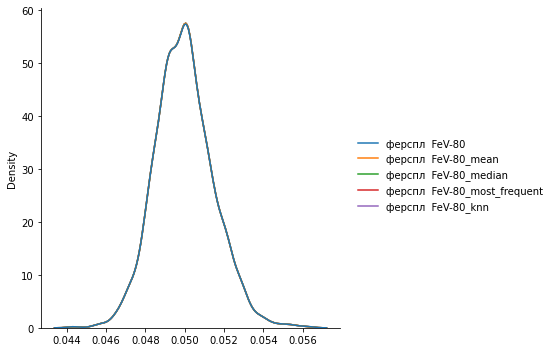

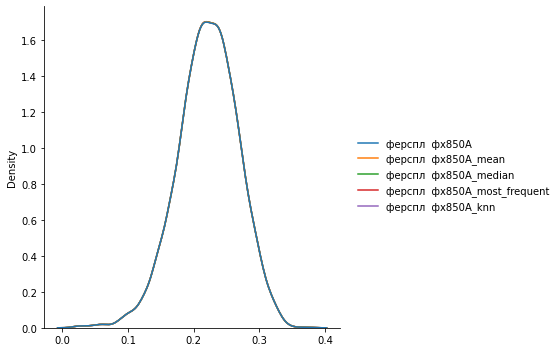

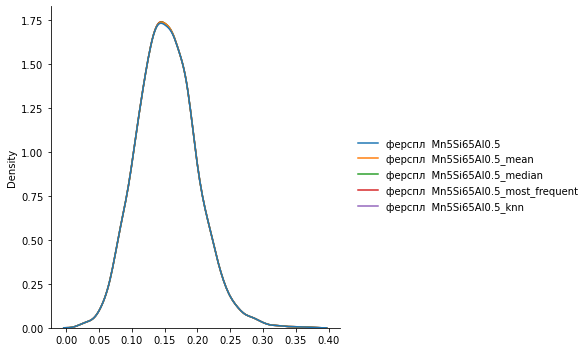

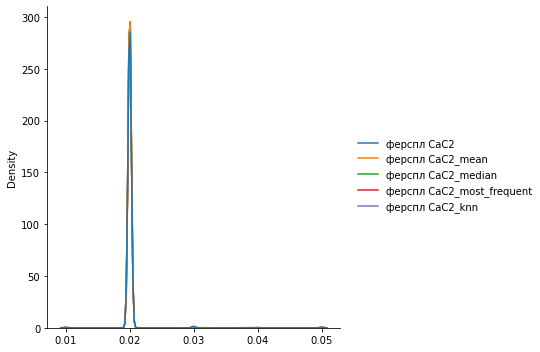

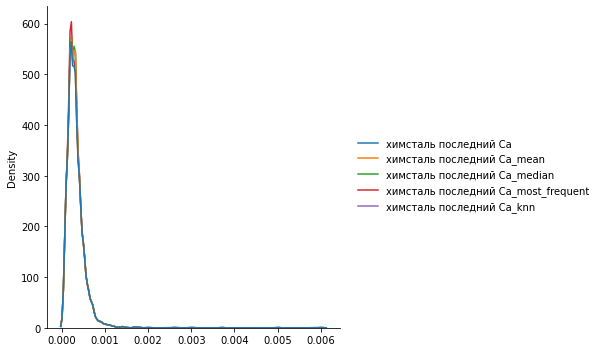

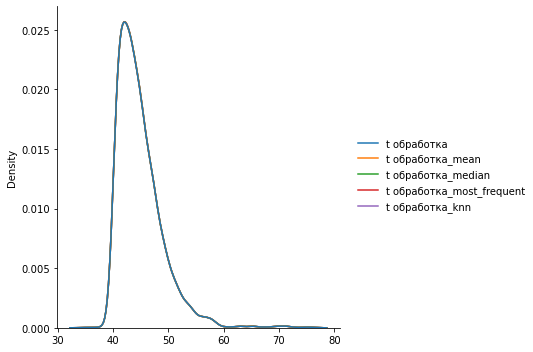

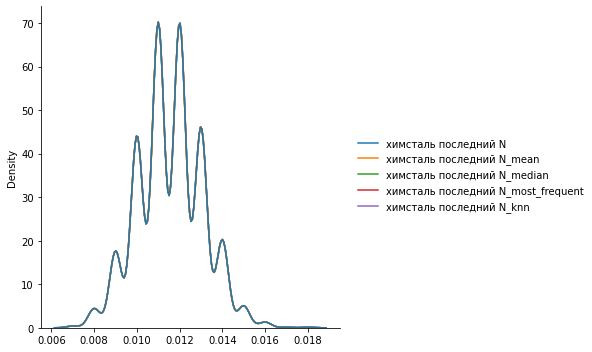

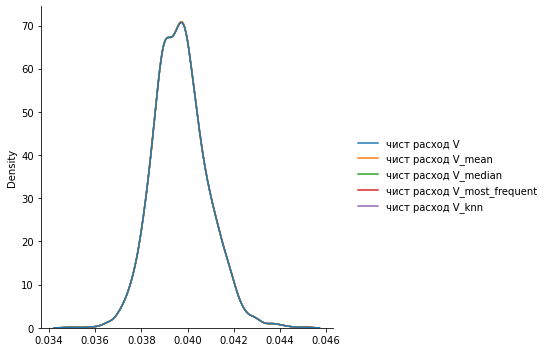

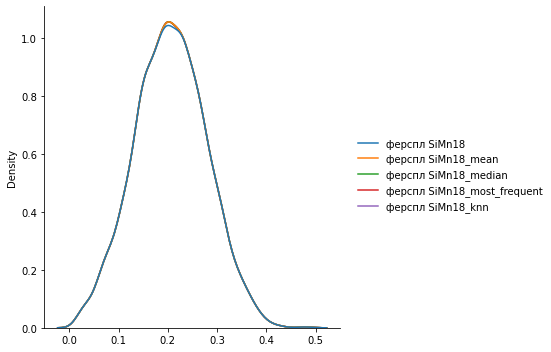

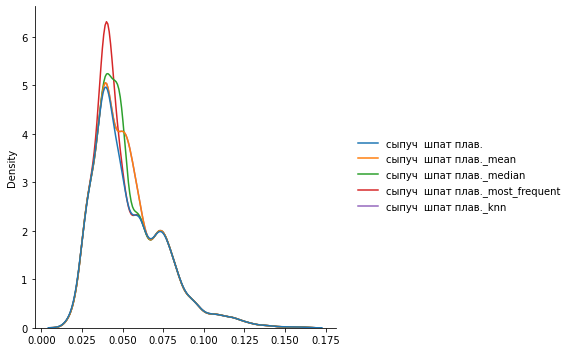

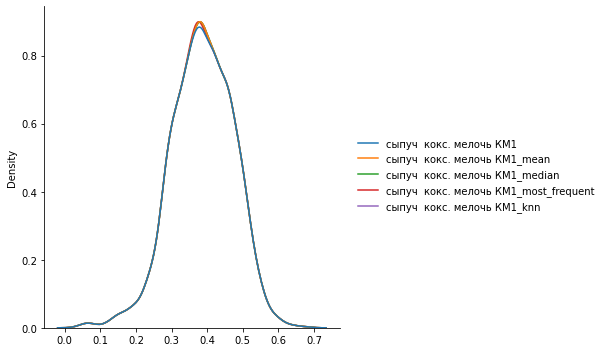

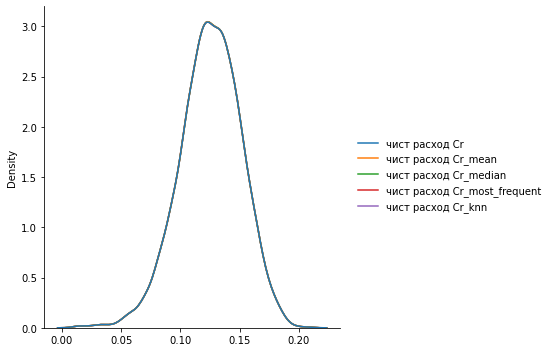

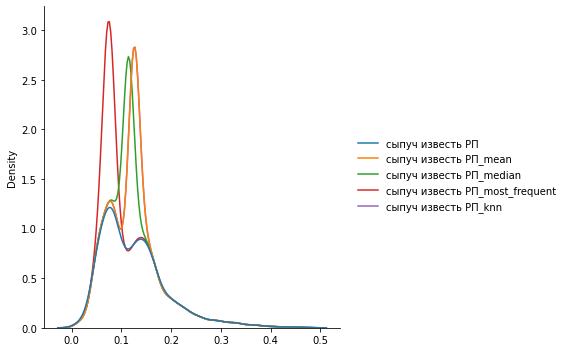

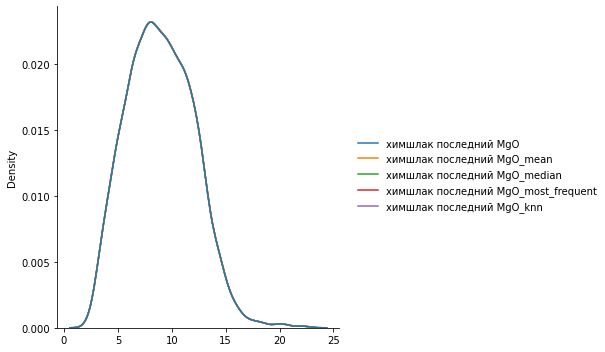

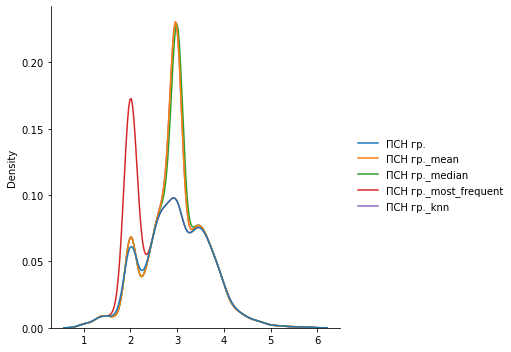

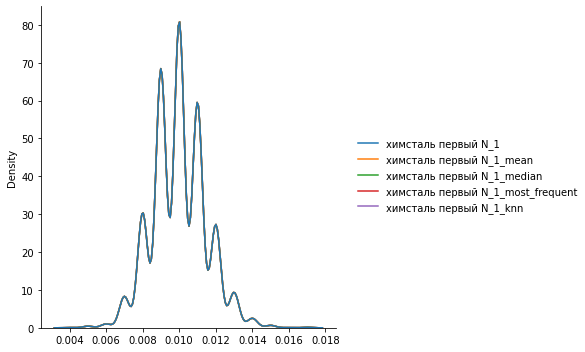

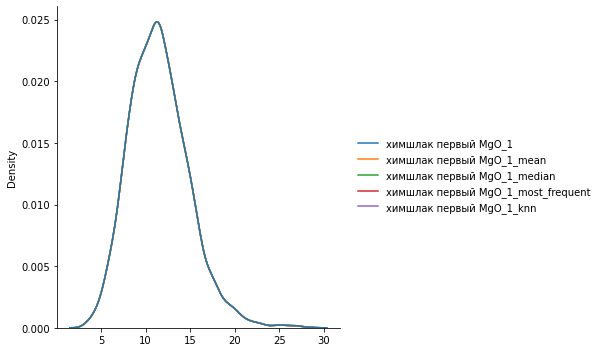

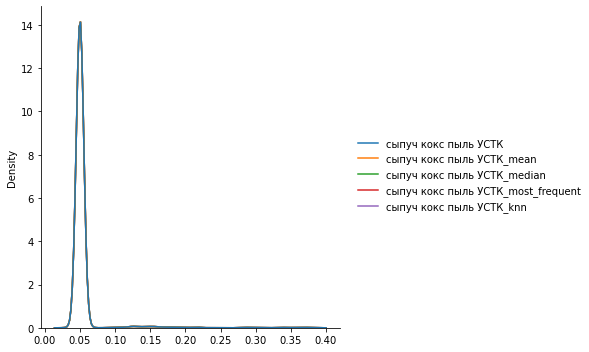

In [52]:
for ind, item in enumerate(nan_cols):
    c=[item, mean_cols[ind],median_cols[ind],freq_cols[ind], knn_cols[ind]]
    sns.displot(df_imp[c], kind='kde')
    plt.show()

kNN Imputer не влияет на изначальные распределения и подходит для всех типов фич. Используем его, чтобы заполнить оставшиеся пропуски.

In [53]:
def knn_impute(df, col):
    imputer = KNNImputer(n_neighbors=2)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    imp_col = [item[0] for item in imp_col.tolist()]
    df[col] = imp_col

#Стратегия knn 
for col in nan_cols:
    knn_impute(df, col)

### Feature correlation and engineering

Сильно коррелирующие между собой фичи можно использовать для создания новых или просто удалить одну из пары.

In [54]:
pearson_corr = df.drop(TARGETS, axis=1).corr(method='pearson', min_periods=50)
pos_corr = np.abs(np.nan_to_num(pearson_corr.values, 0.0))
strong_corr_pairs = []
for i in range(1, len(pos_corr)):
    if np.max(pos_corr[i, :i]) >= 0.7:
        j = np.argmax(pos_corr[i, :i])
        strong_corr_pairs.append((i, j, pearson_corr.values[i, j]))

In [55]:
cols = df.drop(TARGETS, axis=1).columns
cols_dict = dict(list(zip(range(len(cols)), cols)))

In [56]:
# сильно коррелирующие между собой фичи
strong_corr_df = pd.DataFrame(strong_corr_pairs).replace(cols_dict).sort_values(2, ascending=False)
strong_corr_df

0                       1         2
6            ферспл  фх850А          чист расход Cr  0.997215
14    химсталь последний Ni    химсталь первый Ni_1  0.993602
12    химсталь последний Cu    химсталь первый Cu_1  0.989651
5             ферспл SiMn18          чист расход Mn  0.989589
0                t продувка             t обработка  0.987660
3            ферспл  FeV-80           чист расход V  0.985563
7               эл. энергия             t под током  0.962633
15     химсталь последний P     химсталь первый P_1  0.958748
13    химсталь последний Mo    химсталь первый Mo_1  0.957194
1             расход газ Ar            Ar (интенс.)  0.948073
2   сыпуч  кокс. мелочь КМ1           чист расход C  0.944099
4      ферспл  Mn5Si65Al0.5          чист расход Si  0.929269
16    химшлак первый SiO2_1  химшлак первый Al2O3_1  0.910043
8       химсталь первый C_1           чист расход C -0.938656
11     химсталь первый Si_1          чист расход Si -0.940762
9      химсталь первый Cr_1          чист расход Cr -0.980687
10     химсталь первый Mn_1          чист расход Mn -0.982712

In [57]:
# по смыслу можно попробовать разницу или отношение пар
cols_for_engineering = ['химсталь последний Ni',
                        'химсталь последний Cu',
                        'химсталь последний P',
                        'химсталь последний Mo',
                        'химшлак первый SiO2_1',
                        'химсталь первый C_1',
                        'химсталь первый Si_1',
                        'химсталь первый Cr_1']
corr_cols_to_drop = [col for col in strong_corr_df[0] if col not in cols_for_engineering]

In [58]:
pairs = strong_corr_df[strong_corr_df[0].isin(cols_for_engineering)][[0,1]].values
pairs

array([['химсталь последний Ni', 'химсталь первый Ni_1'],
       ['химсталь последний Cu', 'химсталь первый Cu_1'],
       ['химсталь последний P', 'химсталь первый P_1'],
       ['химсталь последний Mo', 'химсталь первый Mo_1'],
       ['химшлак первый SiO2_1', 'химшлак первый Al2O3_1'],
       ['химсталь первый C_1', 'чист расход C'],
       ['химсталь первый Si_1', 'чист расход Si'],
       ['химсталь первый Cr_1', 'чист расход Cr']], dtype=object)

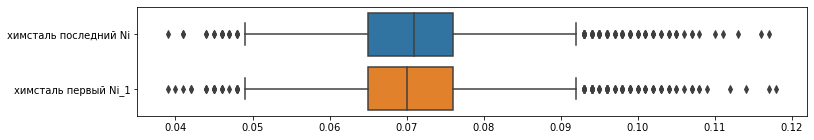

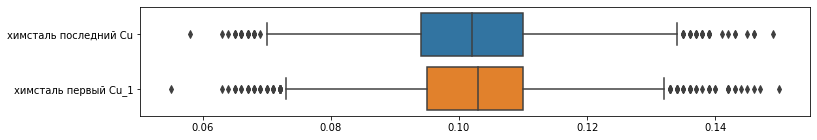

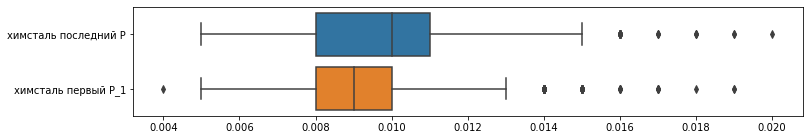

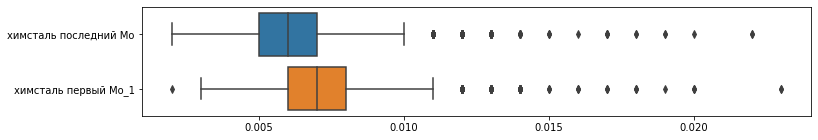

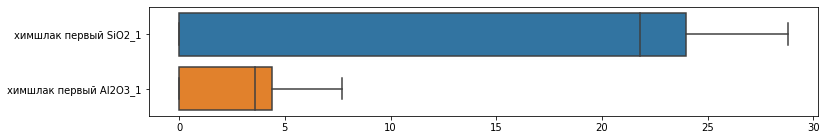

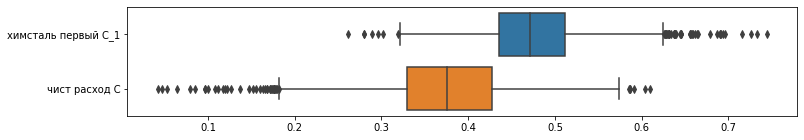

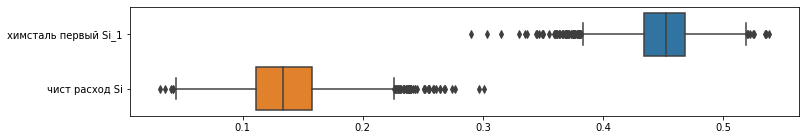

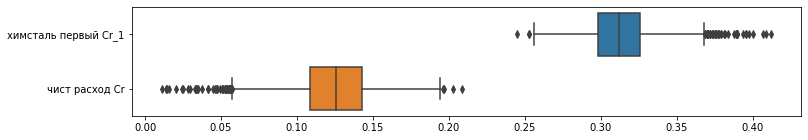

In [59]:
for pair in pairs:
    fig = plt.figure(figsize=(12, 2))
    sns.boxplot(data=df[pair], orient='h')

Одну из колонок с Ni и Cu можно убрать, так как почти дублируются.

In [60]:
# corr_cols_to_drop += ['химсталь первый Cu_1', 'химсталь первый Ni_1']
# corr_cols_to_drop = ['химсталь первый Cu_1', 'химсталь первый Ni_1']

In [61]:
# df.drop(corr_cols_to_drop, axis=1, inplace=True)

Попробуем отношение.

In [62]:
def safe_division(x, y):
    if (x != x) | (y != y) | (y == 0):
        return 0
    return x / y

# cols_to_drop_2=[]
for pair in pairs:
#     if (pair[0] not in corr_cols_to_drop) & (pair[1] not in corr_cols_to_drop):
    new_col = pair[0]+'_'+pair[1]+'_ratio'
    df[new_col] = df.apply(lambda x: safe_division(x[pair[0]],x[pair[1]]), axis=1)
#     cols_to_drop_2 += [pair[0], pair[1]]

In [63]:
# df.drop(cols_to_drop_2, axis=1, inplace=True)

*Комментарий к закомменченному коду*: в итоге больший набор фич лучше повлиял на результаты прогноза, поэтому ничего не выбрасываем.

Попробуем разность температур.

In [64]:
import itertools
t_features = ['t вып-обр', 't обработка', 't под током', 't продувка']
t_combinations = list(itertools.combinations(t_features, 2))

In [65]:
for pair in t_combinations:
    new_col = pair[0]+'_'+pair[1]+'_sub'
    df[new_col] = df.apply(lambda x: x[pair[0]]-x[pair[1]], axis=1)

### Feature importance (potential)

In [66]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [67]:
data = df.dropna().astype(float)
data = (data - data.mean()) / (data.std() + 0.0001)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(columns = TARGETS),
    data[TARGETS],
    test_size=0.3,
    shuffle = True)

In [69]:
clf = linear_model.Lasso(alpha=0.07)
clf.fit(x_train, y_train)

Lasso(alpha=0.07)

In [70]:
names = df.drop(columns = TARGETS).columns
for i,m in enumerate(clf.coef_):
    print('Потенциальные фичи для {}'.format(TARGETS[i]))
    print(names[np.where(m != 0)].values)

Потенциальные фичи для химшлак последний Al2O3
['чист расход Si' 'химсталь первый C_1' 'химшлак первый Al2O3_1'
 'химшлак первый R_1' 'химшлак последний FeO' 'химшлак последний MgO'
 'химшлак последний MnO'
 'химшлак первый SiO2_1_химшлак первый Al2O3_1_ratio']
Потенциальные фичи для химшлак последний CaO
['чист расход C' 'эл. энергия' 'химсталь последний Cu'
 'химшлак первый Al2O3_1' 'химшлак первый CaO_1' 'химшлак первый MnO_1'
 'химшлак первый R_1' 'химшлак последний MgO' 'химшлак последний MnO']
Потенциальные фичи для химшлак последний R
['ферспл SiMn18' 'химшлак первый R_1' 'химшлак последний MgO'
 'химшлак последний MnO' 'химсталь первый Si_1_чист расход Si_ratio']
Потенциальные фичи для химшлак последний SiO2
['ферспл SiMn18' 'химсталь последний N' 'химшлак первый R_1'
 'химшлак первый SiO2_1' 'химшлак последний FeO' 'химшлак последний MgO'
 'химшлак последний MnO'
 'химшлак первый SiO2_1_химшлак первый Al2O3_1_ratio']


In [71]:
important_features = dict.fromkeys(TARGETS, {})
for i,m in enumerate(clf.coef_):
    important_features[TARGETS[i]] = list(names[np.where(m != 0)].values)

### Linear Regression

Мы обнаружили, что после выделения данных для одной марки стали нет пропусков для показателей R и CaO (нечего предсказывать). Поэтому сделаем модели для предсказания только Al2O3 и SiO2, а R и CaO попробуем использовать как дополнительные фичи.

In [72]:
df[TARGETS].count() / df.shape[0]

химшлак последний Al2O3    0.742843
химшлак последний CaO      1.000000
химшлак последний R        1.000000
химшлак последний SiO2     0.742843
dtype: float64

In [73]:
new_pairs = [['химшлак первый CaO_1', 'химшлак последний CaO'], ['химшлак первый R_1', 'химшлак последний R']]
for pair in new_pairs:
    new_col = pair[0]+'_'+pair[1]+'_ratio'
    df[new_col] = df.apply(lambda x: safe_division(x[pair[0]],x[pair[1]]), axis=1)

In [74]:
pred_idx = df[df[TARGETS].isna().any(1)].index
train_test_idx = df[~df[TARGETS].isna().any(1)].index

In [75]:
TARGETS = ['химшлак последний Al2O3', 'химшлак последний SiO2']

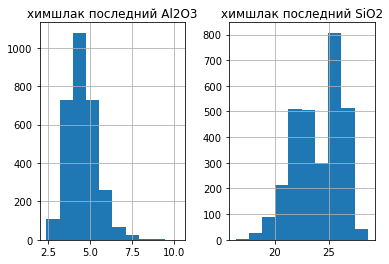

In [76]:
df.loc[train_test_idx, TARGETS].astype(float).hist(); # посмотрим распределения таргетов

Можно применить log-трансформацию.

In [77]:
# определяем порядковые фичи
for col in df.columns:
    if (df[col].nunique() <= 50) & (df[col].dtype != object) & (col not in TARGETS):
        df[col] = df[col].astype('category')

In [78]:
NUMERICAL = df.select_dtypes(exclude=['category', 'object', 'datetime64']).columns.tolist()
ORDINAL = df.select_dtypes(include=['category']).columns.tolist()
for tar in TARGETS:
    if tar in NUMERICAL:
        NUMERICAL.remove(tar)

In [79]:
target = 'химшлак последний Al2O3'
features = set(df.columns) - set(TARGETS)
# features = important_features[target]
X, y = df.loc[train_test_idx, features], df.loc[train_test_idx, target]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=.3, shuffle=True)

In [80]:
# !pip install sklearn_pandas --user
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn_pandas import DataFrameMapper, gen_features

def map_features(features=[]):
    numerical_def = gen_features(
        columns=[[c] for c in NUMERICAL if c in features],
        classes=[
            {'class': StandardScaler}
        ]
    )

    ordinal_def = gen_features(
        columns=[[c] for c in ORDINAL if c in features],
        classes=[
            {'class': MinMaxScaler}
        ]
    )
    return numerical_def + ordinal_def

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(train, val, tr_y, val_y, features, est):
    mapper = DataFrameMapper(features, df_out=True)
    # трансформим отдельно трейн (фиттим) и тест
    train = mapper.fit_transform(train)
    val = mapper.transform(val)
    
    est.fit(train, tr_y)
    pred_val = est.predict(val)
    pred_train = est.predict(train)

    return pd.DataFrame({
        'train_RMSE': [np.sqrt(mean_squared_error(tr_y, pred_train))], 
        'train_R2': [r2_score(tr_y, pred_train)],
        'val_RMSE': [np.sqrt(mean_squared_error(val_y, pred_val))],
        'val_R2': [r2_score(val_y, pred_val)]
    })

In [82]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

reg_Al2O3 = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features), reg_Al2O3)
scores

train_RMSE  train_R2  val_RMSE    val_R2
0    0.122783  0.600244  0.123644  0.621198

Объясняемая доля дисперсии таргета равна ~60%. Обычно значения больше 50% рассматриваются как приемлемые. Значения для трейна и теста примерно одинаковы, т.е. модель обучилась неплохо: нет недообучения и генерализующая способность присутствует.

In [83]:
mapper = DataFrameMapper(map_features(features), df_out=True)
_ = mapper.fit(train_X[features])

In [84]:
# r2 для n_epochs числа случайных разбиений
n_epochs = 1000
r2 = np.zeros(2)
for i in range(n_epochs):
    rs = np.random.randint(1, 10000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs, shuffle = True)
    lin_reg = LinearRegression().fit(mapper.transform(X_train), np.log(y_train+0.001))    
    y_train_pred = lin_reg.predict(mapper.transform(X_train))
    y_test_pred = lin_reg.predict(mapper.transform(X_test))
    r2[0] += r2_score(np.log(y_train+0.001), y_train_pred)
    r2[1] += r2_score(np.log(y_test+0.001), y_test_pred)
    if i %100 == 0:
        print('iteration {}.....'.format(i), end="")
    
r2 / n_epochs # средний скор по разным разбиениям

iteration 0.....iteration 100.....iteration 200.....iteration 300.....iteration 400.....iteration 500.....iteration 600.....iteration 700.....iteration 800.....iteration 900.....

array([0.61600009, 0.57668649])

Предсказательная способность не сильно зависит от разбиения.

In [85]:
def plot_importance(est, colnames, top_n=40):
    importance = pd.DataFrame({
        'abs_weight': np.abs(est.coef_),
        'feature': colnames
    })
    imp20 = importance.sort_values(by='abs_weight', ascending=False)[:top_n]
    fig = plt.figure(figsize=(15,15))
    sns.barplot(y='feature', x='abs_weight', data=imp20, orient='h');
    return imp20['feature'].values

In [87]:
lasso = Lasso(alpha=0)
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features), lasso)
scores

train_RMSE  train_R2  val_RMSE    val_R2
0    0.122703  0.600763  0.123746  0.620574

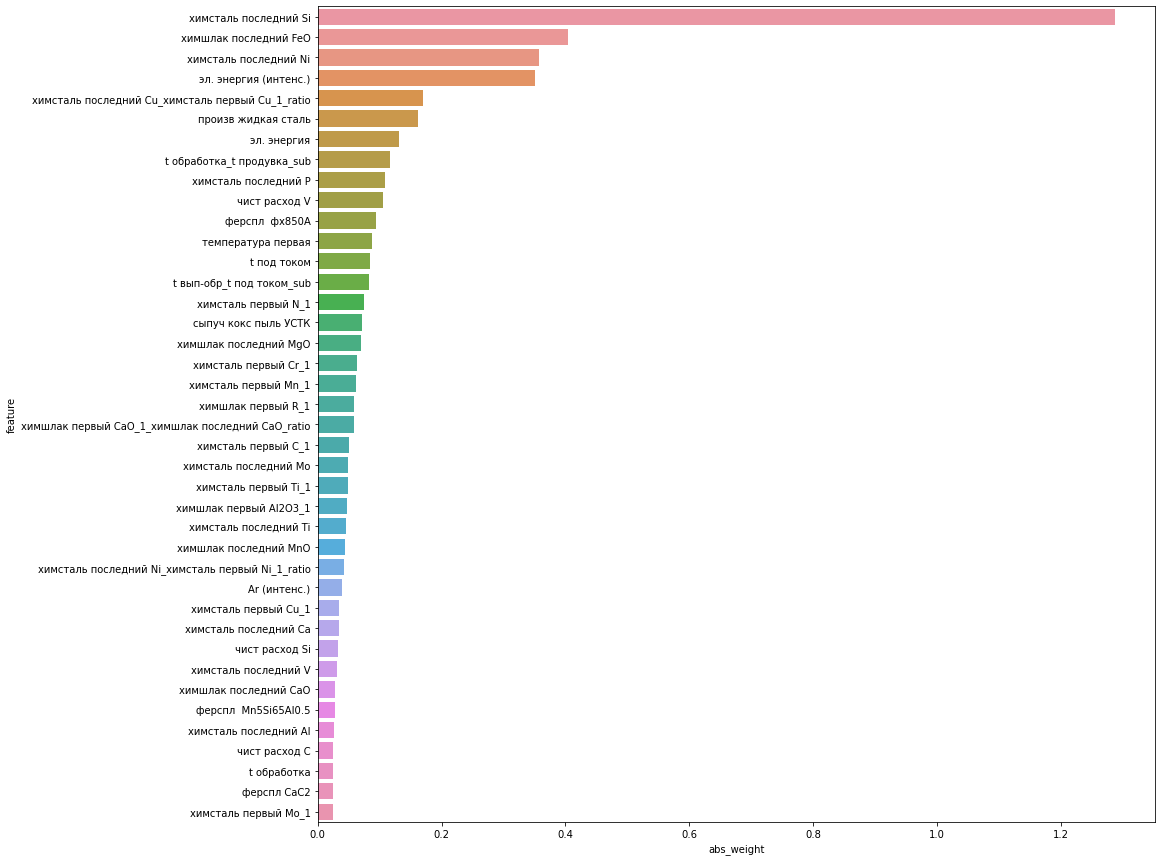

In [88]:
top_features = plot_importance(lasso, train_X.columns)

In [89]:
reg_top = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(top_features), reg_top)
scores

train_RMSE  train_R2  val_RMSE    val_R2
0    0.133677  0.526157  0.132445  0.565353

На топ-фичах результат стал хуже.

#### Следующий таргет

In [90]:
target = 'химшлак последний SiO2'
features_2 = set(df.columns) - set([target]) # добавим колонку Al2O3
X, y = df.loc[train_test_idx, features_2], df.loc[train_test_idx, target]
X['химшлак последний Al2O3'] = reg_Al2O3.predict(mapper.transform(X[features])) # добавим предыдущее предсказание
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=.3, shuffle=True)

In [91]:
reg_SiO2 = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features_2), reg_SiO2)
scores

train_RMSE  train_R2  val_RMSE    val_R2
0    0.019873  0.954213  0.020459  0.953556

Результат очень неплохой.

In [92]:
mapper2 = DataFrameMapper(map_features(features_2), df_out=True)
_ = mapper2.fit(train_X[features_2]) 

## Предсказания

In [93]:
# сначала для Al2O3
X = df.loc[pred_idx, features]
Al2O3_preds = reg_Al2O3.predict(mapper.transform(X))
# потом для SiO2 на расширенном наборе фич
X['химшлак последний Al2O3'] = Al2O3_preds
SiO2_preds = reg_SiO2.predict(mapper2.transform(X))

In [94]:
preds = pd.DataFrame(np.array([Al2O3_preds, SiO2_preds]).T, columns=TARGETS, index=pred_idx)
preds

химшлак последний Al2O3  химшлак последний SiO2
nplv                                                        
г6837?3<87?                 0.875434                2.927263
г683863<887                 0.711280                3.123392
г683863<888                 0.724616                3.046450
г683863<889                 0.765388                3.088747
г683863<968                 0.739570                3.190210
...                              ...                     ...
г683863>6?8                 0.660651                3.154875
г683863>6?9                 0.707038                3.180765
г683863>6?;                 0.877326                3.029016
г683863>6?<                 0.899482                2.999971
г683863>77<                 0.795051                3.146082

[1042 rows x 2 columns]

In [95]:
# preds.to_csv('Прогноз_Al2O3_SiO2.csv')